# SEA Building Energy Benchmarking - Analyse exploratoire

# Plan de projet

----------------------------------------------------------------------------
**NOTEBOOK 1 - SEA Building Energy Benchmarking - Analyse exploratiore**

**1.   Définir la problématique**

Nous nous intéressons aux émissions des bâtiments non destinés à l'habitation dans la ville de Seattle. Le but de ce projet est de :

- Prédire les émissions de CO2
- Prédire la consommation totale d'énergie
- Evaluer l'intérêt de l'ENERGY STAR Score pour la prédiction d'émissions


**2.   Acquisition de données**

Nous disposons de deux fichiers de données de 2015 et 2016 avec des données déclaratives du permis d'exploitation commerciale, ainsi que des données relatives à la consommation d'énergie.

Dans cette étape, nous allons :

- Vérifier le contenu de fichiers de données (taille, présence de doublons)
- Filtrer les données pour obtenir uniquement les données non-résidentielles
- Comparer les fichiers 2015 et 2016
- Cleaning préalable : supprimer les valeurs apparemment fausses (comme par exemple les valeurs de consommation < 0) et recoder les variables texte pour avoir une taille de police unique (enlever valeurs mixtes en majuscules et minuscules) 
- Echantillonner les données en jeu de données d'entraînement et de test. Les analyses exploratoires vont être performées uniquement sur les données d'entraînement. 

L'échantillonnage est fait en prenant la première cible (émissions de CO2) comme vecteur y. L'échantillon test contient 30% de données. Les jeux de données créés :

**X_train_A, X_test_A, y_train_A, y_test_A**

**data** = jeu de données utilisé dans les analyses descriptives qui contient à la fois les données X_train_A, y_train_A.

La modélisation de la partie B du projet (cible = consommation d'énergie) va être effectuée sur le même échantillonnage en échangeant variable représentant les émissions de CO2 contre la variable représentant la consommation totale des immeubles.

**3.   Exploration de données**


3.1 Analyse de valeurs extrêmes

- Analyse descriptive des outliers
- Création d'un DataFrame : 

**data_no_out** - data sans outliers. 

  
3.2 Analyse de données manquantes
 
  
3.3 Analyses descriptives et visualisations

> 3.3.1 Données qualitatives

> 3.3.2 Données quantitatives

> 3.3.3 Analyse de corrélations



  
3.4 Choix de cibles et de features

Dans cette étape, nous étudions la possibilité de transformation de cibles et de features en se basant sur les analyses exploratoires

  


**4.   Préparer les données pour la modélisation**

Ecrire des fonctions pour nettoyer et transformer les données

4.1 Cleaning

> 4.1.1 Gestion d'outliers

> 4.1.2 Recoder les Nan

4.2 Sélection de features

4.3 Feature engineering

> 4.3.1 Recodage de relevés de consommation en variables qualitatives (utilisation (oui/non) de certain type d'énergie et proportion de la consommation totale)

> 4.3.2 Transformations de variables (log, sqrt, x^2)

> 4.3.3 Agrégation de features 
- Création de Source - site ratio
- Création de Proportion de surface de bâtiment de la surface totale

> 4.3.4 Standardisation 

---------------------------------------------------------------------------------------------------------------
**NOTEBOOK 2 - SEA Building Energy Benchmarking - Modélisation**

**5.   Trouver des modèles pertinents**

**A - Modélisation d'émissions de CO2**

**B - Modélisation de la consommation totale**

5.1 Entraîner plusieurs modèles : 

> 5.1.1 Régression linéaire 

> 5.1.2 Arbres de décision

> 5.1.3 Forêts aléatoires


5.2 Mesurer et comparer leur pertinence - validation croisée

5.3 Analyser variables les plus importantes pour chaque algorithme

5.4 Analyser le type d'erreur pour chaque modèle

5.5 Choisir les modèles les plus pertinents


**6.   Finaliser les modèles**

**A - Modélisation d'émissions de CO2**

6.1 A Ajustement de paramètres 

Nous allons optimiser les hyperparamètres de la régression linéaire :

>  - Ridge

>  - Lasso

>  - Elastic net

6.2 A Méthodes ensemblistes 

Nous allons utiliser le bagging afin de générer plusieurs modèles à l'aide d'échantillonnage de nos données et à la fin rendre les modèles plus robustes grâce à leur agrégation.

6.3 A Mesurer les performances de modèle final

Nous allons étudier la précision de modèle final à l'aide de données test.


**B - Modélisation de la consommation totale**

6.1 B Ajustement de paramètres

Nous allons rechercher les meilleurs hyperparamètres pour la construction d'une forêt aléatoire grâce à la recherche sur grille. Nous allons ainsi déterminer le nombre optimal d'arbres, le nombre optimal de features qui rentrent dans le modèle et justifier l'utilisation de bootstrap.

6.2 B Mesurer les performances de modèle final

Idem comme 6.3 A

**7.   Evaluer l'intérêt d'ENERGY STAR Score** 

Nous allons étudier l'importance de feature ENERGY STAR Score dans la prédiction d'émissions de CO2 de bâtiment.

----------------------------------------------------------------------------------------------------------------------
**PRESENTATION - Anticiper les besoins en consommation électrique de bâtiments**

**8.   Présenter la solution**


# 0 - Charger les bibliothèques

In [1]:
#Importer les bibliothèques pour le traitement de données
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Importer les bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.display import display, HTML

#Importer les bibliothèques pour les statistiques
from scipy import stats
from scipy.stats.stats import pearsonr

#Importer les bibliothèques de machine learning
from sklearn import model_selection

#Importer les bibliothèques pour la visualisation géographique
import geopandas as gpd
import folium

#Importer math
import math

#Importer joblib (enregistrement d'objets de sci-kit)
import joblib

In [2]:
#Disable warning pour .loc
pd.options.mode.chained_assignment = None  # default='warn'

# 1 - Définir la problématique

# 2 - Acquisition de données

## 2.1 - Importation de données 

In [3]:
#Ouverture de données 2015 comme DataFrame
data2015 = pd.read_csv('2015-building-energy-benchmarking.csv', sep=',')

Les données sont présentées sous format DataFrame.

In [4]:
print ("Le jeu de données complet 2015 contient", data2015.shape[0], "observations et", data2015.shape[1], "variables.")  

Le jeu de données complet 2015 contient 3340 observations et 47 variables.


In [5]:
#Ouverture de données 2016 comme DataFrame
data2016 = pd.read_csv('2016-building-energy-benchmarking.csv', sep=',')

In [6]:
print ("Le jeu de données complet 2016 contient", data2016.shape[0], "observations et", data2016.shape[1], "variables.")  

Le jeu de données complet 2016 contient 3376 observations et 46 variables.


## 2.2 Vérification de jeu de données

Dans un premier temps, nous allons regarder s'il y a des observations en double. 

In [7]:
any(data2015.duplicated())

False

Nous vérifions aussi s'il existe des doublons dans le ID du batiment qui est censé d'être unique.

In [8]:
any(data2015.duplicated('OSEBuildingID'))

False

In [9]:
any(data2016.duplicated())

False

In [10]:
any(data2016.duplicated('OSEBuildingID'))

False

Pas d'observations en double.

## 2.3 Filtrage de données 

In [11]:
#Nous allons analyser uniquement les bâtiments non résidentiels :
data2015 = data2015[data2015['BuildingType']=='NonResidential']

In [12]:
print ("Le jeu de données qui contient les bâtiments non-résidentiels 2015 contient", data2015.shape[0], "observations et", data2015.shape[1], "variables.")  

Le jeu de données qui contient les bâtiments non-résidentiels 2015 contient 1461 observations et 47 variables.


In [13]:
#Nous allons analyser uniquement les bâtiments non résidentiels :
data2016 = data2016[data2016['BuildingType']=='NonResidential']

In [14]:
print ("Le jeu de données qui contient les bâtiments non-résidentiels 2016 contient", data2016.shape[0], "observations et", data2016.shape[1], "variables.")  

Le jeu de données qui contient les bâtiments non-résidentiels 2016 contient 1460 observations et 46 variables.


## 2.4 Comparaison de fichiers 2015 et 2016

### 2.4.1 Variables en commun 

Dans un premier temps, nous allons établir une liste des variables communs et des variables propres au jeux de données 2015 et 2016 :

In [15]:
var2015 = data2015.columns
var2016 = data2016.columns
var = var2015.append(var2016)
var_commun = var[var.duplicated()==True]

In [16]:
print ("La liste suivante contient les variables communs aux jeux de données 2015 et 2016 :", '\n' ,var_commun)

La liste suivante contient les variables communs aux jeux de données 2015 et 2016 : 
 Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier'],


In [17]:
var_propres2015 = var2015.difference(var2016)
print ("La liste suivante contient les variables propres au jeu de données 2015 :", '\n' ,var_propres2015)

La liste suivante contient les variables propres au jeu de données 2015 : 
 Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')


In [18]:
var_propres2016 = var2016.difference(var2015)
print ("La liste suivante contient les variables propres au jeu de données 2016 :", '\n' ,var_propres2016)

La liste suivante contient les variables propres au jeu de données 2016 : 
 Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')


### 2.4.2 Renommer les variables 

Selon la description de données (https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2016-building-energy-benchmarking.csv), variables 'GHGEmissions(MetricTonsCO2e)' de données 2015 et variable 'TotalGHGEmissions' de données 2016 contient les mêmes mesures. Nous allons renommer la variable 2015 pour simplifier les analyses.

In [19]:
data2015.rename(columns={'GHGEmissions(MetricTonsCO2e)' : 'TotalGHGEmissions'}, inplace=True)

Selon la description de données (https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2016-building-energy-benchmarking.csv), variables 'GHGEmissionsIntensity(kgCO2e/ft2)' de données 2015 et variable 'GHGEmissionsIntensity' de données 2016 contient les mêmes mesures. Nous allons renommer la variable 2015 pour simplifier les analyses.

In [20]:
data2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)' : 'GHGEmissionsIntensity'}, inplace=True)

### 2.4.3 Imputation de valeurs manquantes par combinaison de fichiers 

Variables LargestPropertyUseType, LargestPropertyUseTypeGFA et ENERGYSTARScore contient un nombre non négligeable de valeurs manquantes. Etant donné que les valeurs ne changent très probablement pas d'une année à l'autre, nous allons imputer les valeurs manquantes de 2015 par les valeurs de 2016 et vise-versa.

Il est important de faire cet étape avant le split de jeu de données en jeu d'entraînement et de test car nous risquons de ne pas avoir les mêmes observations dans les jeux 2015 et 2016 et perdre de l'information.

##### Data 2015

In [21]:
print("Avant imputation, la variable LargestPropertyUseType 2015 contient", 
      sum(data2015['LargestPropertyUseType'].isna()), "données manquantes." )

data2015['LargestPropertyUseType'] = data2015['LargestPropertyUseType'].combine_first(data2016['LargestPropertyUseType'])

print("Après imputation, la variable LargestPropertyUseType 2015 contient", 
      sum(data2015['LargestPropertyUseType'].isna()), "données manquantes." )

print("Avant imputation, la variable LargestPropertyUseTypeGFA 2015 contient", 
      sum(data2015['LargestPropertyUseTypeGFA'].isna()), "données manquantes." )

data2015['LargestPropertyUseTypeGFA'] = data2015['LargestPropertyUseTypeGFA'].combine_first(data2016['LargestPropertyUseTypeGFA'])

print("Après imputation, la variable LargestPropertyUseTypeGFA 2015 contient", 
      sum(data2015['LargestPropertyUseTypeGFA'].isna()), "données manquantes." )

print("Avant imputation, la variable ENERGYSTARScore 2015 contient", 
      sum(data2015['ENERGYSTARScore'].isna()), "données manquantes." )

data2015['ENERGYSTARScore'] = data2015['ENERGYSTARScore'].combine_first(data2016['ENERGYSTARScore'])

print("Après imputation, la variable ENERGYSTARScore 2015 contient", 
      sum(data2015['ENERGYSTARScore'].isna()), "données manquantes." )

Avant imputation, la variable LargestPropertyUseType 2015 contient 61 données manquantes.
Après imputation, la variable LargestPropertyUseType 2015 contient 18 données manquantes.
Avant imputation, la variable LargestPropertyUseTypeGFA 2015 contient 61 données manquantes.
Après imputation, la variable LargestPropertyUseTypeGFA 2015 contient 18 données manquantes.
Avant imputation, la variable ENERGYSTARScore 2015 contient 448 données manquantes.
Après imputation, la variable ENERGYSTARScore 2015 contient 314 données manquantes.


###### Data 2016

In [22]:
print("Avant imputation, la variable LargestPropertyUseType 2016 contient", 
      sum(data2016['LargestPropertyUseType'].isna()), "données manquantes." )

data2016['LargestPropertyUseType'] = data2016['LargestPropertyUseType'].combine_first(data2015['LargestPropertyUseType'])

print("Après imputation, la variable LargestPropertyUseType 2016 contient", 
      sum(data2016['LargestPropertyUseType'].isna()), "données manquantes." )

print("Avant imputation, la variable LargestPropertyUseTypeGFA 2016 contient", 
      sum(data2016['LargestPropertyUseTypeGFA'].isna()), "données manquantes." )

data2016['LargestPropertyUseTypeGFA'] = data2016['LargestPropertyUseTypeGFA'].combine_first(data2015['LargestPropertyUseTypeGFA'])

print("Après imputation, la variable LargestPropertyUseTypeGFA 2016 contient", 
      sum(data2016['LargestPropertyUseTypeGFA'].isna()), "données manquantes." )

print("Avant imputation, la variable ENERGYSTARScore 2016 contient", 
      sum(data2016['ENERGYSTARScore'].isna()), "données manquantes." )

data2016['ENERGYSTARScore'] = data2016['ENERGYSTARScore'].combine_first(data2015['ENERGYSTARScore'])

print("Après imputation, la variable ENERGYSTARScore 2016 contient", 
      sum(data2016['ENERGYSTARScore'].isna()), "données manquantes." )

Avant imputation, la variable LargestPropertyUseType 2016 contient 6 données manquantes.
Après imputation, la variable LargestPropertyUseType 2016 contient 3 données manquantes.
Avant imputation, la variable LargestPropertyUseTypeGFA 2016 contient 6 données manquantes.
Après imputation, la variable LargestPropertyUseTypeGFA 2016 contient 3 données manquantes.
Avant imputation, la variable ENERGYSTARScore 2016 contient 465 données manquantes.
Après imputation, la variable ENERGYSTARScore 2016 contient 315 données manquantes.


## 2.5 Cleaning préalable 

Après avoir effectué une courte analyse préalable pour examiner des incohérences dans les valeurs de variables, nous avons constaté notamment des valeurs négatives dans les surfaces et les consommations d'énérgie, ainsi qu'un cadage miste entre majuscules et minuscules dans la variable neighborhood. Nous allons réparer ces incohérences dans cet étape pour avoir une meilleure vision dans l'analyse exploratoire.

### 2.2.1 - Valeurs négatives 

In [23]:
def rec_neg_nan(data, *args):
    """Fonction qui va reconder des valeurs négatives en Nan. 
    
    Entrées : 
    data : DataFrame
    *args : Liste de variables à recoder (valeurs en '')
    
    Sortie : DataFrame data recodé 
    """
    for var in args:
        data[var]=np.where(data[var]<0, np.nan, data[var])
        
    return data

In [24]:
data2015 = rec_neg_nan(data2015, 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'SourceEUIWN(kBtu/sf)')

In [25]:
data2016 = rec_neg_nan(data2016, 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'Electricity(kBtu)', 
                      'GHGEmissionsIntensity', 'TotalGHGEmissions')

### 2.2.2 - Recodage variables Neighborhood

In [26]:
neighborhood=list(data2016['Neighborhood'])
neighborhood_rec = [i.title() for i in neighborhood]
data2016['Neighborhood']=neighborhood_rec

## 2.6 Création d'un jeu de données d'entraînement et de test 

Nous avons effectué une analyse préalable de nos deux jeux de données. Les deux fichiers de 2015 et de 2016 contient les mêmes variables d'intérêt et mise à part 2 cas, la même population. Nous avons donc décidé de se baser sur les données plus récentes de 2016. 

Nous avons séparer les données en test et train en prenant la première cible (TotalGHGEmissions) comme vecteur Y. Le jeu de donné train va servir pour les analyses descriptives, ainsi que pour entraîner les modèles de prédiction des émissions (partie A du projet = jeux de données X_train_A, X_test_A, y_train_A, y_test_A)). La prédiction de la deuxième cible (SiteEnergyUse(kBtu)) va être fait sur le même jeu de données en échangeant la cible émissions CO2 contre le cible consommation d'énergie au moment de modélisation (partie B du projet = jeux de données X_train_B, X_test_B, y_train_B, y_test_B).

Nous allons créer un échantillon test de taille de 30% de la population.

In [27]:
X = data2016.drop(['TotalGHGEmissions'], axis=1) 

In [28]:
y = data2016['TotalGHGEmissions']

In [29]:
X_train_A, X_test_A, y_train_A, y_test_A = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
print ("Le jeu de données X_train_A contient", X_train_A.shape[0], "observations et", X_train_A.shape[1], "features.") 
print ("Le vecteur y_train_A contient", y_train_A.shape[0], "observations.") 
print ("Le jeu de données X_test_A contient", X_test_A.shape[0], "observations et", X_test_A.shape[1], "features.") 
print ("Le vecteur y_test_A contient", y_test_A.shape[0], "observations.")  

Le jeu de données X_train_A contient 1022 observations et 45 features.
Le vecteur y_train_A contient 1022 observations.
Le jeu de données X_test_A contient 438 observations et 45 features.
Le vecteur y_test_A contient 438 observations.


Finalement, nous allons aussi créer un DataFrame "data" que nous allons utiliser pour les analyses et qui contient à la fois les données X_train_A et la cible y_train_A. 

In [31]:
data = pd.concat([X_train_A,y_train_A],axis=1)

In [32]:
print ("Le jeu de données data contient", data.shape[0], "observations et", data.shape[1], "colonnes.") 

Le jeu de données data contient 1022 observations et 46 colonnes.


Les données test sont vérifiés et enregistrés dans un fichier que nous allons traiter lors de validation de nos modèles finals.

In [33]:
data_test = pd.concat([X_test_A,y_test_A],axis=1)

In [34]:
print ("Le jeu de données data contient", data_test.shape[0], "observations et", data_test.shape[1], "colonnes.") 

Le jeu de données data contient 438 observations et 46 colonnes.


In [35]:
data_test.to_csv('Data/data_test.csv', sep='\t')

# 3. Exploration de données 

### 3.1 Analyse de valeurs extrêmes

Les visualisations de données (voir figures ci-dessous - chapître 3.3) nous ont permis de voir les valeurs qui semblent beaucoup plus elevées que les autres. Etant donné que nous n'avons pas d'indication exactes sur les valeurs maximales de nos variables, nous allons analyser "manuellement" les données qui semblent élevées afin de statuer s'il s'agit d'une valeur plausible ou si c'est une erreur à éliminer. Afin de faire ceci, nous allons nous aider de deux principes :

1.) Regarder si les valeurs extrêmes sont les mêmes dans les variables "grouppées" - par exemple la variable elle-même et sa normalisation météo ou variable en kWh et la même valeur en kBtu.

2.) Nous allons regarder la moyen et l'écart-type dans la classe "PrimaryPropertyType". 

Nous avons créé des fonctions qui renvoient les statistiques pour les observations extrêmes. Une troisième fonction va créer un flag qui est mergé avec les données d'origin.

Les valeurs qui seront examinées sont les suivantes :

- SiteEUI(kBtu/sf) > 400
- SiteEUIWN(kBtu/sf) > 400

- SourceEUI(kBtu/sf) > 1000
- SourceEUIWN(kBtu/sf) > 1000

- SiteEnergyUse(kBtu) > 1*10^8
- SiteEnergyUseWN(kBtu) > 1*10^8

- SteamUse(kBtu) > 6*10^7

- Electricity(kWh) > 2*10^7
- Electricity(kBtu) > 2*10^7

- NaturalGas(therms) > 200 000
- NaturalGas(kBtu) > 2*10^7

- TotalGHGEmissions > 2000


In [36]:
def valeurs_extremes1(data, var1, val1):
    
    """Fonction qui analyse une variable grouppée qui contient des valeurs extrêmes supérieures à un barème 
    défini par l'utilisateur.
    
    Entrées :
        - data = DataFrame avec le jeu de données
        - var1 = variable
        - val1 = barème 
        
    Sorties :
        - Affichage de :
            * Nombre de valeurs extrêmes, moyen et écart type global de la variable
            * Tableau avec les n# d'observations, PrimaryPropertyType, moyen de groupe PPT, écart-type de groupe PPT 
            
            
    """
    df1 = data[data[var1]>val1]
    n1 = df1.shape[0]
    mean1 = round(data[var1].mean(),2)
    std1 = round(data[var1].std(),2)
    
    df_group1 = data.groupby(['PrimaryPropertyType'])[[var1]]
    
    mean_gp1 = df_group1.mean()
    std_gp1 = df_group1.std()

    mean_gp1.rename(columns={var1:'Mean_group'}, inplace=True)
    std_gp1.rename(columns={var1:'Std_group'}, inplace=True)

    df1=df1[['OSEBuildingID', 'PrimaryPropertyType', var1]]

    df1 = pd.merge(df1, mean_gp1, on='PrimaryPropertyType', how='left')
    df1 = pd.merge(df1, std_gp1, on='PrimaryPropertyType', how='left')

    print (
      var1, '\n',
     "Nombre de valeurs extrêmes : ", n1, '\n',
     "Moyen global : ", mean1, '\n',
     "Ecart-type global : ", std1, '\n','\n',
       
     df1)


In [37]:
def valeurs_extremes2(data, var1, var2, val1, val2):
    
    """Fonction qui analyse deux variables grouppées qui contiennent des valeurs extrêmes supérieures à un barème 
    défini par l'utilisateur.
    
    Entrées :
        - data = DataFrame avec le jeu de données
        - var1 = variable n#1
        - var2 = variable n#2
        - val1 = barème n#1
        - val2 = barème n#2
        
    Sorties :
        - Affichage de :
            * Nombre de valeurs extrêmes, moyen et écart type global des deux variables
            * Tableau avec les n# d'observations, PrimaryPropertyType, moyen de groupe PPT, écart-type de groupe PPT 
            et outlier_var2 qui indique si la valeur extrême de l'observation est aussi présente chez la variable grouppée

            
    """
    df1 = data[data[var1]>val1]
    df2 = data[data[var2]>val2]

    n1 = df1.shape[0]
    n2 = df2.shape[0]

    mean1 = round(data[var1].mean(),2)
    mean2 = round(data[var2].mean(),2)

    std1 = round(data[var1].std(),2)
    std2 = round(data[var2].std(),2)

    df_group1 = data.groupby(['PrimaryPropertyType'])[[var1]]
    df_group2 = data.groupby(['PrimaryPropertyType'])[[var2]]

    mean_gp1 = df_group1.mean()
    std_gp1 = df_group1.std()
    mean_gp2 = df_group2.mean()
    std_gp2 = df_group2.std()

    mean_gp1.rename(columns={var1:'Mean_group'}, inplace=True)
    std_gp1.rename(columns={var1:'Std_group'}, inplace=True)
    mean_gp2.rename(columns={var2:'Mean_group'}, inplace=True)
    std_gp2.rename(columns={var2:'Std_group'}, inplace=True)

    df1=df1[['OSEBuildingID', 'PrimaryPropertyType', var1]]
    df2=df2[['OSEBuildingID', 'PrimaryPropertyType', var2]]

    df1 = pd.merge(df1, mean_gp1, on='PrimaryPropertyType', how='left')
    df1 = pd.merge(df1, std_gp1, on='PrimaryPropertyType', how='left')

    df2 = pd.merge(df2, mean_gp2, on='PrimaryPropertyType', how='left')
    df2 = pd.merge(df2, std_gp2, on='PrimaryPropertyType', how='left')

    df=pd.concat([df1,df2], sort=False, ignore_index=True)

    df['Outlier_var2']=df['OSEBuildingID'].duplicated(keep=False)

    df1=df[df[var2].isnull()]
    df2=df[df[var1].isnull()]

    df1=df1.drop([var2], axis=1)
    df2=df2.drop([var1], axis=1)

      
    print (
      var1, '\n',
     "Nombre de valeurs extrêmes : ", n1, '\n',
     "Moyen global : ", mean1, '\n',
     "Ecart-type global : ", std1, '\n','\n',
        
     var2, '\n',
     "Nombre de valeurs extrêmes : ", n2, '\n',
     "Moyen global : ", mean2, '\n',
     "Ecart-type global : ", std2, '\n','\n',
        
     df1, '\n', '\n',
     df2)

In [38]:
def valeurs_extremes_flag(data, var1, val1):
    
    """Fonction qui renvoie un flag "var_outlier" pour toutes les valeurs supérieures à un barème 
    défini par l'utilisateur. Le flag est mergé avec les données d'origin.
    
    Entrées :
        - data = DataFrame avec le jeu de données
        - var1 = variable d'intérêt
        - val1 = barème
        
    Sorties :
        - data mise à jour avec le flag
            
    """
    df1 = data[data[var1]>val1]
    
    flag1 = DataFrame({var1:True}, index=df1['OSEBuildingID'])
    
    flag1=flag1.add_suffix('_outlier')
    
    data= pd.merge(data, flag1, on='OSEBuildingID', how='left')
    
    return data

In [39]:
valeurs_extremes1(X_train_A, 'SteamUse(kBtu)', 60000000)

SteamUse(kBtu) 
 Nombre de valeurs extrêmes :  1 
 Moyen global :  393569.24 
 Ecart-type global :  4209997.89 
 
    OSEBuildingID PrimaryPropertyType  SteamUse(kBtu)  Mean_group     Std_group
0            276            Hospital     122575032.0  24515006.4  5.481722e+07


In [40]:
Y_A = DataFrame()
valeurs_extremes1(data, 'TotalGHGEmissions', 2000)

TotalGHGEmissions 
 Nombre de valeurs extrêmes :  6 
 Moyen global :  152.74 
 Ecart-type global :  436.57 
 
    OSEBuildingID PrimaryPropertyType  TotalGHGEmissions   Mean_group  \
0              3               Hotel            2089.28   404.418182   
1            338               Other            2055.82   195.204062   
2            389               Hotel            2573.75   404.418182   
3             63               Hotel            2451.58   404.418182   
4          23113      Medical Office            3238.24   314.960833   
5            276            Hospital           10734.57  3112.320000   

     Std_group  
0   557.375933  
1   366.036124  
2   557.375933  
3   557.375933  
4   673.473513  
5  4330.990688  


In [41]:
valeurs_extremes2(data,'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',400,400 )

SiteEUI(kBtu/sf) 
 Nombre de valeurs extrêmes :  7 
 Moyen global :  73.59 
 Ecart-type global :  76.44 
 
 SiteEUIWN(kBtu/sf) 
 Nombre de valeurs extrêmes :  7 
 Moyen global :  75.67 
 Ecart-type global :  76.99 
 
    OSEBuildingID          PrimaryPropertyType  SiteEUI(kBtu/sf)  Mean_group  \
0          19900                   Laboratory        696.700012  277.066667   
1            365                        Other        834.400024  109.783464   
2          26986  Supermarket / Grocery Store        412.700012  237.725002   
3            440           Mixed Use Property        707.299988  101.332000   
4            753                        Other        639.700012  109.783464   
5          49709                        Other        593.599976  109.783464   
6          23503                   Restaurant        456.600006  186.116669   

    Std_group  Outlier_var2  
0  210.837826          True  
1  115.741916          True  
2   80.521550          True  
3  106.275803          True  

In [42]:
valeurs_extremes2(data,'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',1000,1000 )

SourceEUI(kBtu/sf) 
 Nombre de valeurs extrêmes :  7 
 Moyen global :  182.17 
 Ecart-type global :  199.44 
 
 SourceEUIWN(kBtu/sf) 
 Nombre de valeurs extrêmes :  7 
 Moyen global :  184.05 
 Ecart-type global :  199.08 
 
    OSEBuildingID PrimaryPropertyType  SourceEUI(kBtu/sf)  Mean_group  \
0          19900          Laboratory         1206.699951  586.116658   
1            365               Other         2620.000000  275.549219   
2            466               Other         1026.599976  275.549219   
3            440  Mixed Use Property         2217.800049  252.654668   
4            637  Mixed Use Property         1150.300049  252.654668   
5            753               Other         2007.900024  275.549219   
6          49709               Other         1527.300049  275.549219   

    Std_group  Outlier_var2  
0  312.928340          True  
1  336.887658          True  
2  336.887658          True  
3  308.667001          True  
4  308.667001          True  
5  336.887658    

In [43]:
valeurs_extremes2(data,'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',100000000,100000000)

SiteEnergyUse(kBtu) 
 Nombre de valeurs extrêmes :  3 
 Moyen global :  7635264.89 
 Ecart-type global :  17183758.56 
 
 SiteEnergyUseWN(kBtu) 
 Nombre de valeurs extrêmes :  3 
 Moyen global :  7716239.31 
 Ecart-type global :  17236433.33 
 
    OSEBuildingID PrimaryPropertyType  SiteEnergyUse(kBtu)    Mean_group  \
0          23113      Medical Office          102673696.0  1.316879e+07   
1            276            Hospital          293090784.0  9.273865e+07   
2            753               Other          274682208.0  1.046807e+07   

      Std_group  Outlier_var2  
0  2.077523e+07          True  
1  1.147838e+08          True  
2  2.704103e+07          True   
 
    OSEBuildingID PrimaryPropertyType    Mean_group     Std_group  \
3          23113      Medical Office  1.336801e+07  2.103792e+07   
4            276            Hospital  8.945675e+07  1.177635e+08   
5            753               Other  1.064969e+07  2.710025e+07   

   SiteEnergyUseWN(kBtu)  Outlier_var2  
3      

In [44]:
valeurs_extremes2(data,'Electricity(kWh)','Electricity(kBtu)',20000000,70000000)

Electricity(kWh) 
 Nombre de valeurs extrêmes :  5 
 Moyen global :  1656318.53 
 Ecart-type global :  4038768.2 
 
 Electricity(kBtu) 
 Nombre de valeurs extrêmes :  4 
 Moyen global :  5651358.82 
 Ecart-type global :  13780277.08 
 
    OSEBuildingID PrimaryPropertyType  Electricity(kWh)    Mean_group  \
0            355        Large Office        20116302.0  4.756594e+06   
1            775        Large Office        25747908.0  4.756594e+06   
2            440  Mixed Use Property        21957020.0  2.144081e+06   
3            276            Hospital        49438336.0  1.526632e+07   
4            753               Other        80460872.0  2.340104e+06   

      Std_group  Outlier_var2  
0  4.501973e+06         False  
1  4.501973e+06          True  
2  4.094186e+06          True  
3  1.945118e+07          True  
4  7.560272e+06          True   
 
    OSEBuildingID PrimaryPropertyType    Mean_group     Std_group  \
5            775        Large Office  1.622950e+07  1.536073e+07  

In [45]:
valeurs_extremes2(data,'NaturalGas(therms)','NaturalGas(kBtu)',200000,20000000 )

NaturalGas(therms) 
 Nombre de valeurs extrêmes :  9 
 Moyen global :  15600.82 
 Ecart-type global :  37413.02 
 
 NaturalGas(kBtu) 
 Nombre de valeurs extrêmes :  9 
 Moyen global :  1560082.49 
 Ecart-type global :  3741301.77 
 
    OSEBuildingID PrimaryPropertyType  NaturalGas(therms)     Mean_group  \
0          19900          Laboratory         224136.6094  102078.748698   
1             26               Other         206266.3125   21602.060319   
2            147            Hospital         328535.1250  161349.389464   
3            267               Hotel         256831.6250   45223.396108   
4            338               Other         346853.3125   21602.060319   
5          49732            Hospital         300613.2500  161349.389464   
6             27               Other         296021.5000   21602.060319   
7             63               Hotel         233249.9219   45223.396108   
8          23113      Medical Office         546713.9375   33492.270605   

       Std_grou

Les analyses ne nous ont pas donné suffisamment de preuves pour supposer qu'il s'agit de données éronnées. Les bâtiments concernés sont souvent des établissements particulières comme hôpitaux ou hôtels, qui peuvent fortément varier en taille et peuvent exiger des consommations importantes.

In [46]:
data = valeurs_extremes_flag(data,'SiteEUI(kBtu/sf)', 400)

In [47]:
data = valeurs_extremes_flag(data,'SiteEUIWN(kBtu/sf)', 400)

In [48]:
data = valeurs_extremes_flag(data,'SourceEUI(kBtu/sf)', 1000)

In [49]:
data = valeurs_extremes_flag(data,'SourceEUIWN(kBtu/sf)', 1000)

In [50]:
data = valeurs_extremes_flag(data,'SiteEnergyUse(kBtu)', 100000000)

In [51]:
data = valeurs_extremes_flag(data,'SiteEnergyUseWN(kBtu)', 100000000)

In [52]:
data = valeurs_extremes_flag(data,'SteamUse(kBtu)', 60000000)

In [53]:
data = valeurs_extremes_flag(data,'Electricity(kWh)', 20000000)

In [54]:
data = valeurs_extremes_flag(data,'Electricity(kBtu)', 70000000)

In [55]:
data = valeurs_extremes_flag(data,'NaturalGas(therms)', 200000)

In [56]:
data = valeurs_extremes_flag(data,'NaturalGas(kBtu)', 20000000)

In [57]:
data = valeurs_extremes_flag(data,'TotalGHGEmissions', 2000)

Finalement, nous allons créer un jeu de données sans outliers que nous allons utiliser dans ceraines analyses.

In [58]:
data_no_out = data[data['SiteEUI(kBtu/sf)_outlier']!=True]

In [59]:
data_no_out = data_no_out[data_no_out['SiteEUIWN(kBtu/sf)_outlier']!=True]

In [60]:
data_no_out = data_no_out[data_no_out['SourceEUI(kBtu/sf)_outlier']!=True]

In [61]:
data_no_out = data_no_out[data_no_out['SourceEUIWN(kBtu/sf)_outlier']!=True]

In [62]:
data_no_out = data_no_out[data_no_out['SiteEnergyUse(kBtu)_outlier']!=True]

In [63]:
data_no_out = data_no_out[data_no_out['SiteEnergyUseWN(kBtu)_outlier']!=True]

In [64]:
data_no_out = data_no_out[data_no_out['SteamUse(kBtu)_outlier']!=True]

In [65]:
data_no_out = data_no_out[data_no_out['Electricity(kWh)_outlier']!=True]

In [66]:
data_no_out = data_no_out[data_no_out['Electricity(kBtu)_outlier']!=True]

In [67]:
data_no_out = data_no_out[data_no_out['NaturalGas(therms)_outlier']!=True]

In [68]:
data_no_out = data_no_out[data_no_out['NaturalGas(kBtu)_outlier']!=True]

In [69]:
data_no_out = data_no_out[data_no_out['TotalGHGEmissions_outlier']!=True]

In [70]:
data_no_out.shape

(1000, 58)

## 3.2 - Analyse de données manquantes

In [71]:
#Création d'une DataFrame sui résume les données manquantes pour chaque variable
variables = data.columns

types = data.dtypes

#Déterminer le nombre de données manquantes par variable
count_na=data.isna().sum()

#Déterminer le % de données manquantes par variable
pourc_na=round(count_na/data.shape[0],2)*100

ar=np.array([variables, types, count_na, pourc_na]).T
variables_desc=pd.DataFrame(ar, index=range(data.shape[1]), columns =['Variable', 'Type', 'Nombre de NaN', 'Nombre de NaN (%)'] )

variables_desc

Variable     Type Nombre de NaN Nombre de NaN (%)
0                     OSEBuildingID    int64             0                 0
1                          DataYear    int64             0                 0
2                      BuildingType   object             0                 0
3               PrimaryPropertyType   object             0                 0
4                      PropertyName   object             0                 0
5                           Address   object             0                 0
6                              City   object             0                 0
7                             State   object             0                 0
8                           ZipCode  float64             0                 0
9     TaxParcelIdentificationNumber   object             0                 0
10              CouncilDistrictCode    int64             0                 0
11                     Neighborhood   object             0                 0
12                         Latitude  float64             0                 0
13                        Longitude  float64             0                 0
14                        YearBuilt    int64             0                 0
15                NumberofBuildings  float64             1                 0
16                   NumberofFloors    int64             0                 0
17                 PropertyGFATotal    int64             0                 0
18               PropertyGFAParking    int64             0                 0
19           PropertyGFABuilding(s)    int64             0                 0
20        ListOfAllPropertyUseTypes   object             1                 0
21           LargestPropertyUseType   object             3                 0
22        LargestPropertyUseTypeGFA  float64             3                 0
23     SecondLargestPropertyUseType   object           488                48
24  SecondLargestPropertyUseTypeGFA  float64           488                48
25      ThirdLargestPropertyUseType   object           795                78
26   ThirdLargestPropertyUseTypeGFA  float64           795                78
27         YearsENERGYSTARCertified   object           955                93
28                  ENERGYSTARScore  float64           212                21
29                 SiteEUI(kBtu/sf)  float64             2                 0
30               SiteEUIWN(kBtu/sf)  float64             2                 0
31               SourceEUI(kBtu/sf)  float64             1                 0
32             SourceEUIWN(kBtu/sf)  float64             2                 0
33              SiteEnergyUse(kBtu)  float64             1                 0
34            SiteEnergyUseWN(kBtu)  float64             2                 0
35                   SteamUse(kBtu)  float64             1                 0
36                 Electricity(kWh)  float64             2                 0
37                Electricity(kBtu)  float64             2                 0
38               NaturalGas(therms)  float64             1                 0
39                 NaturalGas(kBtu)  float64             1                 0
40                      DefaultData     bool             0                 0
41                         Comments  float64          1022               100
42                 ComplianceStatus   object             0                 0
43                          Outlier   object          1012                99
44            GHGEmissionsIntensity  float64             2                 0
45                TotalGHGEmissions  float64             2                 0
46         SiteEUI(kBtu/sf)_outlier   object          1015                99
47       SiteEUIWN(kBtu/sf)_outlier   object          1015                99
48       SourceEUI(kBtu/sf)_outlier   object          1015                99
49     SourceEUIWN(kBtu/sf)_outlier   object          1015                99
50      SiteEnergyUse(kBtu)_outlier   object          1019               100
51    SiteEnergyUseWN(k

Notre variable d'intérêt, ENERGYSTARScore, contient 22% de valeurs manquantes. Il s'agit d'une variable déterminé par "efficiency ratio" calculée comme suit:

efficiency ratio = actual Source energy use intensity EUI / predicted Source energy use intensity EUI

predicted Source energy use intensity EUI est déterminé par une régression de variables qui caractérisent l'activité commerciale et la moyenne nationale de type de bâtiment.

Efficiency ratio est ensuite convertie à une valeur entre 0 et 100 points.

Le calcul détaillé est décrit dans le document disponible en cliquant sur le lien suivant :


In [72]:
display(HTML("""<a href="https://portfoliomanager.energystar.gov/pdf/reference/ENERGY%20STAR%20Score.pdf">ENERGY STAR Score Portfolio Manager</a>"""))

Certains types de bâtiments, comme parkings, piscines ou Data Centers n'ont pas de Score ENERGY STAR. Nous allons voir si c'est le cas de nos valeurs manquantes :

In [73]:
ESS_NaN = data_no_out[data_no_out['ENERGYSTARScore'].isnull()]

In [74]:
ESS_NaN.shape

(207, 58)

In [75]:
ESS_OK = data_no_out[data_no_out['ENERGYSTARScore'].isnull()==False]

In [76]:
ESS_OK.shape

(793, 58)

In [77]:
ESS_NaN['PrimaryPropertyType'].value_counts()

Other                          72
Mixed Use Property             38
Small- and Mid-Sized Office    24
Warehouse                      14
Self-Storage Facility          13
Retail Store                   11
University                     10
Restaurant                      5
Distribution Center             5
Refrigerated Warehouse          4
Laboratory                      3
Worship Facility                2
Hotel                           2
Large Office                    2
Senior Care Community           1
Residence Hall                  1
Name: PrimaryPropertyType, dtype: int64

Les données manquantes ne sont pas justifiées par le type de bâtiment.

Nous allons regarder si la variable est corrélée avec la consommation d'énergie, pour avoir une idée si l'imputation multiple serait utile :

In [78]:
ESS_OK_clean = ESS_OK[['ENERGYSTARScore','SourceEUI(kBtu/sf)' ]]
ESS_OK_clean.dropna(inplace=True)

In [79]:
stats.pearsonr(ESS_OK_clean['ENERGYSTARScore'], ESS_OK_clean['SourceEUI(kBtu/sf)'])

(-0.36110884120417214, 8.376498776366845e-26)

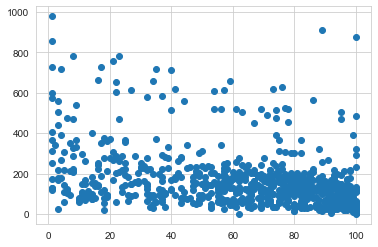

In [80]:
plt.scatter(ESS_OK_clean['ENERGYSTARScore'], ESS_OK_clean['SourceEUI(kBtu/sf)'])

Le coefficient de détermination R2 = -0.39 indique que la corrélation entre ENERGYSTARScore et SourceEUI(kBtu/sf) est faible.

Le recodage de valeur manquantes le plus juste pourra être fait par imputation multiples. Par contre, nous allons nous limiter à remplacer les Nan par la médiane. 

Les données contiennent des valeurs manquantes suivantes :
    
1. Présence de quelques observations manquantes dans les données relatives à la consommation 1 - 2 observations. Ces observations vont être imputées par la médiane.
    
2. Variables :
    
    SecondLargestPropertyUseType
    
    SecondLargestPropertyUseTypeGFA
    
    ThirdLargestPropertyUseType
    
    ThirdLargestPropertyUseTypeGFA
    
    YearsENERGYSTARCertified
    
    Comments
    
    Outlier
    
Les variables vont être recodées en remplaçant les valeurs manquantes par 'None' pour les variables qualitatives et par 0 pour les variables quantitatives.

3. Variable ENERGYSTARScore (22% de Nan)

Cette variable va être recodée par imputation de la valeur médiane.


## 3.3  Analyses descriptives et visualisations

### 3.1 - Données qualitatives

In [81]:
# Pour faciliter les analyses descriptives, nous allons créer une fonction qui calcule le nombre et le pourcentage 
# de chaque modalité d'une variable qualitative

def desc_quali(data, variable):
    ''' Fonction qui calcule le nombre et le pourcentage de chaque modalité d'une variable qualitative
    args : data = DataFrame
           variable = le nom de variable en format 'NomDeVariable'
           
    sorties : DataFrame avec les modalités de variables, nombre et pourcentage de chaque modalité,
    ainsi que le nombre + pourcentage de  
    '''
    count = DataFrame(data[variable].value_counts())
    count['Pourcentage'] = count.apply(lambda row: round(row*100/sum(count[variable]),2))
    
    NA = data[variable].isna().sum()
    pourc_na=round(NA/data.shape[0],2)*100
    df = DataFrame([NA, pourc_na]).T
    df.rename(columns={0:variable, 1:'Pourcentage'}, index={0:'NaN'}, inplace=True)
    
    count = pd.concat([count, df])
    
    return count

In [82]:
desc_quali(data, 'DataYear')

DataYear  Pourcentage
2016    1022.0        100.0
NaN        0.0          0.0

###### BuildingType

Description : City of Seattle building type classification.

In [83]:
desc_quali(data, 'BuildingType')

BuildingType  Pourcentage
NonResidential        1022.0        100.0
NaN                      0.0          0.0

##### PrimaryPropertyType 

Description : The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.

In [84]:
PPT =  desc_quali(data, 'PrimaryPropertyType')
PPT

PrimaryPropertyType  Pourcentage
Small- and Mid-Sized Office                194.0        18.98
Other                                      128.0        12.52
Warehouse                                  121.0        11.84
Large Office                               118.0        11.55
Mixed Use Property                          76.0         7.44
Retail Store                                74.0         7.24
Hotel                                       55.0         5.38
Worship Facility                            52.0         5.09
Distribution Center                         38.0         3.72
Supermarket / Grocery Store                 28.0         2.74
K-12 School                                 27.0         2.64
Medical Office                              24.0         2.35
Self-Storage Facility                       20.0         1.96
Residence Hall                              16.0         1.57
University                                  12.0         1.17
Senior Care Community                       11.0         1.08
Refrigerated Warehouse                      10.0         0.98
Laboratory                                   6.0         0.59
Restaurant                                   6.0         0.59
Hospital                                     5.0         0.49
Low-Rise Multifamily                         1.0         0.10
NaN                                          0.0         0.00

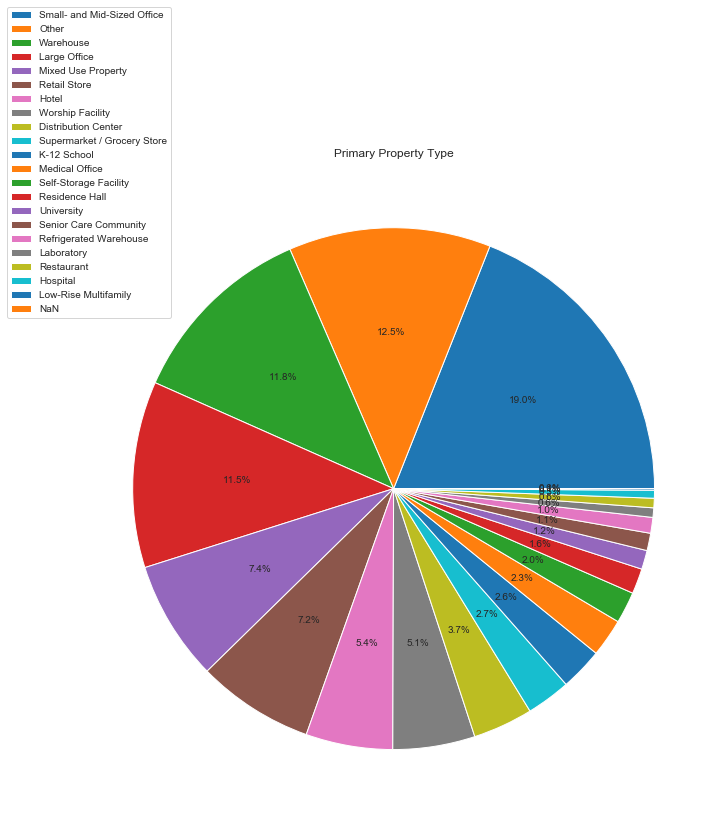

In [85]:
fig = plt.figure(figsize = (12,12))

plt.title('Primary Property Type')
plt.pie(PPT['PrimaryPropertyType'], autopct='%1.1f%%')
plt.legend(PPT.index, loc='center left', bbox_to_anchor=(-0.1, 1.))

##### PropertyName

Official or common property name.

In [86]:
desc_quali(data, 'PropertyName')

PropertyName  Pourcentage
Bayview Building                                          2.0          0.2
Airport Way                                               2.0          0.2
J.G. Scripps Building                                     1.0          0.1
Gateway Plaza                                             1.0          0.1
AM Building                                               1.0          0.1
ABM/ Johnson Barrow                                       1.0          0.1
Rosen Building - SEDO                                     1.0          0.1
West Coast Wire Rope & Rigging Inc                        1.0          0.1
Sun Food Trading Co                                       1.0          0.1
Mars Hill Church West Seattle                             1.0          0.1
HART First Hill LLC                                       1.0          0.1
Safeway 1965 - Rainier Ave                                1.0          0.1
Seattle Vault Self Storage                                1.0          0.1
517 E Pike St Building                                    1.0          0.1
1605 Boylston                                             1.0          0.1
Oddfellows                                                1.0          0.1
(ID21483) Madore Building                                 1.0          0.1
Jefferson Square SWAS1490/                                1.0          0.1
Administration - Blackford Hall                           1.0          0.1
Washington Hall                                           1.0          0.1
Gibraltar Tower                                           1.0          0.1
The Peck Building                                         1.0          0.1
Georgetown Center Bldg A                                  1.0          0.1
James Tower                                               1.0          0.1
719 2nd Ave (Millennium Tower)                            1.0          0.1
Puget Sound Energy Georgetown Operations Center           1.0          0.1
Denny Building                                            1.0          0.1
Building B                                                1.0          0.1
Northgate Plaza                                           1.0          0.1
Upstairs Downstairs Apartments                            1.0          0.1
...                                                       ...          ...
LONG Building Technologies                                1.0          0.1
Seattle Keiro                                             1.0          0.1
Meaves Building                                           1.0          0.1
Queen Anne Square East (200)                              1.0          0.1
6th & Holgate Building                                    1.0          0.1
Building F                                                1.0          0.1
Shultz Distribution                                       1.0          0.1
FleetPride                                                1.0          0.1
Queen Anne Evangelical Lutheran Church                    1.0          0.1
(ID25025) 1801 Ranier Ave S                               1.0          0.1
Shoreline                                                 1.0          0.1
Northgate Mall                                            1.0          0.1
4245 Roosevelt 2ros4245                                   1.0          0.1
Pacific Western Agencies                                  1.0          0.1
The Central Building                                      1.0          0.1
Market St Center                                          1.0          0.1
Sound Mental Health                                       1.0          0.1
Chromer Building                                          1.0          0.1
Fisher Plaza - West Building                              1.0          0.1
FremontBridgeMini                                         1.0          0.1
200 Cedar Street Building                                 1.0          0.1
307 Westlake - SEDO                                       1.0          0.1

##### TaxParcelIdentificationNumber 

Property King County PIN

In [87]:
desc_quali(data, 'TaxParcelIdentificationNumber')

TaxParcelIdentificationNumber  Pourcentage
1625049001                            5.0         0.49
3224049012                            4.0         0.39
0925049346                            4.0         0.39
3224049007                            3.0         0.29
0002400002                            3.0         0.29
3624039009                            3.0         0.29
0225049077                            3.0         0.29
1978200280                            2.0         0.20
2768301991                            2.0         0.20
0467000420                            2.0         0.20
7666204876                            2.0         0.20
3148650000                            2.0         0.20
0656000045                            2.0         0.20
0939000300                            2.0         0.20
7666206865                            2.0         0.20
6822100520                            2.0         0.20
3573200250                            2.0         0.20
7015350000                            2.0         0.20
8809700040                            2.0         0.20
8681450000                            2.0         0.20
0002400003                            2.0         0.20
2824049007                            2.0         0.20
1868903240                            2.0         0.20
1959701300                            1.0         0.10
6054550000                            1.0         0.10
0942000365                            1.0         0.10
7132800055                            1.0         0.10
4088803725                            1.0         0.10
5335200281                            1.0         0.10
1986200380                            1.0         0.10
...                                   ...          ...
3573700406                            1.0         0.10
7942600330                            1.0         0.10
7442000545                            1.0         0.10
1370802570                            1.0         0.10
0942000345                            1.0         0.10
2436200935                            1.0         0.10
5530510000                            1.0         0.10
3958900851                            1.0         0.10
7327903120                            1.0         0.10
2768300955                            1.0         0.10
1025049006                            1.0         0.10
2767702985                            1.0         0.10
0925049118                            1.0         0.10
3126049156                            1.0         0.10
7376600510                            1.0         0.10
0656000130                            1.0         0.10
7987400060                            1.0         0.10
1453600740                            1.0         0.10
4088804350                            1.0         0.10
7666202991                            1.0         0.10
8591400005                            1.0         0.10
2771100510                            1.0         0.10
1973200389                            1.0         0.10
8590900085                            1.0         0.10
1142000550                            1.0         0.10
3573201061                            1.0         0.10
2767700935                            1.0         0.10
5016001680                            1.0         0.10
1926049434                            1.0         0.10
NaN                                   0.0         0.00

[989 rows x 2 columns]

##### CouncilDistrictCode 

Property City of Seattle council district.

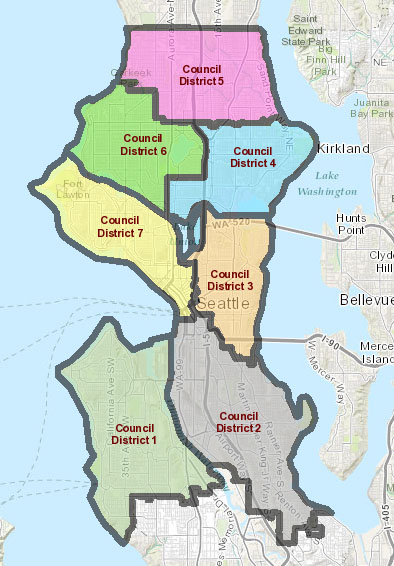

In [88]:
from IPython.display import Image
Image('Figures/DistrictsMap.jpg')

In [89]:
CDC =  desc_quali(data, 'CouncilDistrictCode')
CDC

CouncilDistrictCode  Pourcentage
7                  341.0        33.37
2                  249.0        24.36
3                  116.0        11.35
4                  107.0        10.47
6                   74.0         7.24
1                   68.0         6.65
5                   67.0         6.56
NaN                  0.0         0.00

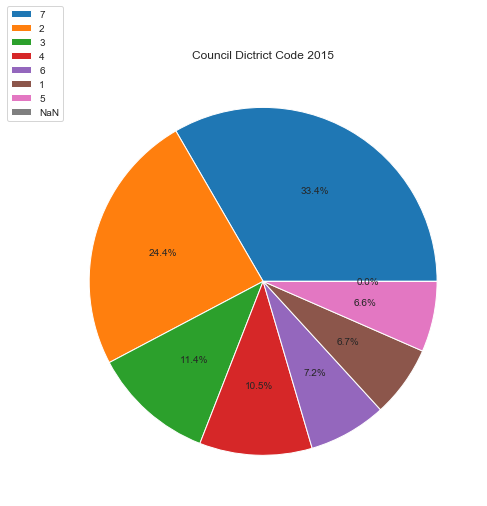

In [90]:
fig = plt.figure(figsize = (8,8))

plt.title('Council Dictrict Code 2015')
plt.pie(CDC['CouncilDistrictCode'], autopct='%1.1f%%')
plt.legend(CDC.index, loc='center left', bbox_to_anchor=(-0.1, 1.))

##### Neighborhood 

L'image ci-dessous représente une carte de "Neighborhoods". 

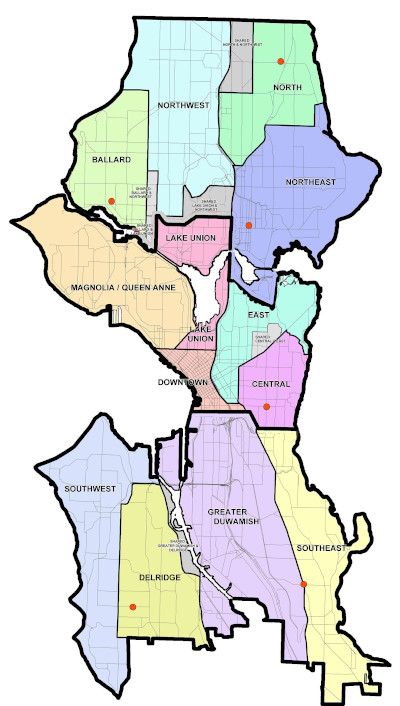

In [91]:
Image('Figures/seattle-neighborhood-map.jpg')

In [92]:
Neigh = desc_quali(data, 'Neighborhood')
Neigh

Neighborhood  Pourcentage
Downtown                      253.0        24.76
Greater Duwamish              226.0        22.11
Lake Union                     92.0         9.00
Northeast                      84.0         8.22
Magnolia / Queen Anne          80.0         7.83
East                           68.0         6.65
Northwest                      46.0         4.50
Ballard                        46.0         4.50
North                          31.0         3.03
Central                        29.0         2.84
Southwest                      26.0         2.54
Delridge                       23.0         2.25
Southeast                      18.0         1.76
NaN                             0.0         0.00

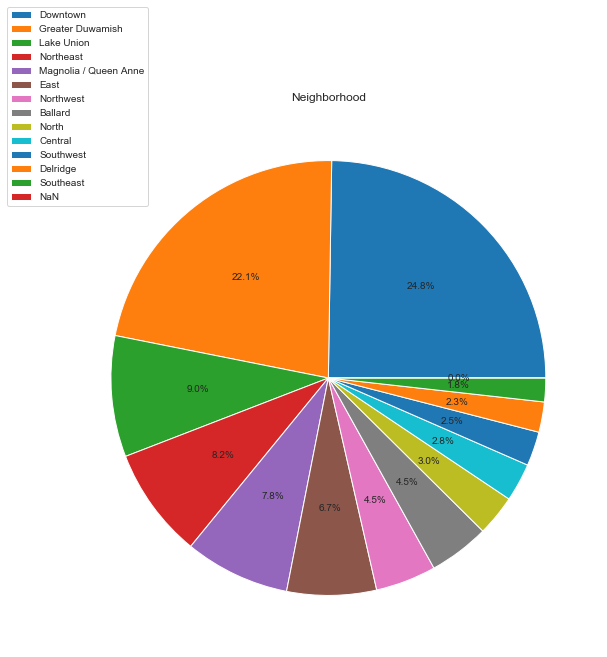

In [93]:
fig = plt.figure(figsize = (10,10))

plt.title('Neighborhood')
plt.pie(Neigh['Neighborhood'], autopct='%1.1f%%')
plt.legend(Neigh.index, loc='center left', bbox_to_anchor=(-0.1, 1.))

##### Données de géolocalisation 

Nous allons représenter nos points sur une carte grâce à la latitude et longitude de bâtiments.

In [94]:
carte = folium.Map(location=[47.6062095,-122.3320708], zoom_start=11)

tooltip = 'Click me!'

for i in data.index:
    
    folium.Marker([data['Latitude'][i],data['Longitude'][i]], popup=data['PropertyName'][i], tooltip = tooltip).add_to(carte)

In [95]:
display(carte)

In [96]:
carte.save('Figures/carte_obj.html')

Pour voir la densité de points :

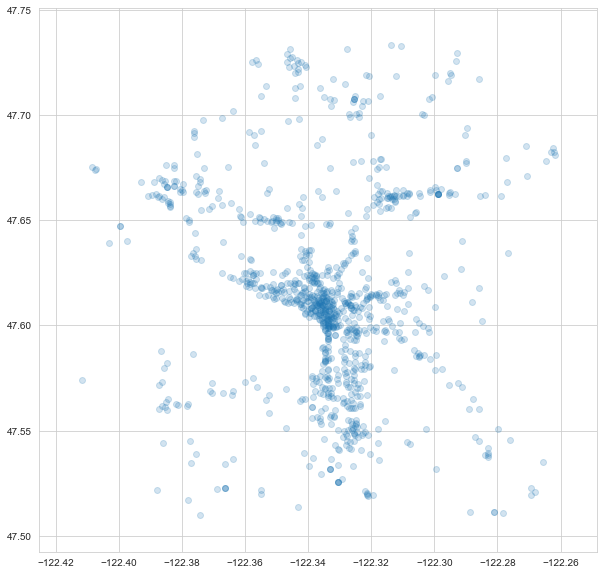

In [97]:
fig = plt.figure(figsize = (10,10))

plt.scatter( x=data["Longitude"], y=data["Latitude"], alpha=0.2)

##### LargestPropertyUseType 

In [98]:
LPUT = desc_quali(data, 'LargestPropertyUseType')
LPUT

LargestPropertyUseType  \
Office                                                               335.0   
Non-Refrigerated Warehouse                                           128.0   
Retail Store                                                          76.0   
Hotel                                                                 56.0   
Worship Facility                                                      52.0   
Other                                                                 49.0   
Distribution Center                                                   39.0   
Supermarket/Grocery Store                                             29.0   
K-12 School                                                           27.0   
Medical Office                                                        27.0   
Parking                                                               22.0   
Self-Storage Facility                                                 19.0   
Residence Hall/Dormitory                                              17.0   
College/University                                                    12.0   
Senior Care Community                                                 11.0   
Other - Entertainment/Public Assembly                                 11.0   
Refrigerated Warehouse                                                10.0   
Laboratory                                                             9.0   
Social/Meeting Hall                                                    8.0   
Other - Recreation                                                     8.0   
Multifamily Housing                                                    7.0   
Restaurant                                                             6.0   
Manufacturing/Industrial Plant                                         5.0   
Hospital (General Medical & Surgical)                                  5.0   
Strip Mall                                                             4.0   
Urgent Care/Clinic/Other Outpatient                                    4.0   
Bank Branch                                                            4.0   
Other/Specialty Hospital                                               4.0   
Other - Education                                                      3.0   
Fitness Center/Health Club/Gym                                         3.0   
Other - Public Services                                                2.0   
Other - Services                                                       2.0   
Other - Mall                                                           2.0   
Other - Restaurant/Bar                                                 2.0   
Automobile Dealership                                                  2.0   
Other - Lodging/Residential                                            2.0   
Repair Services (Vehicle, Shoe, Locksmith, etc)                        2.0   
Performing Arts                                                        2.0   
Lifestyle Center                                                       2.0   
Financial Office                                                       2.0   
Data Center                                                            2.0   
Personal Services (Health/Beauty, Dry Cleaning,...                     1.0   
Food Service                                                           1.0   
Museum                                                                 1.0   
Pre-school/Daycare                                                     1.0   
Courthouse                                                             1.0   
Adult Education                                                        1.0   
Convention Center                                                      1.0   
NaN                                                                    3.0   

                                                    Pourcentage  
Office                                                    32.88  
Non-Refrigerated Wa

##### DefaultData 

In [99]:
desc_quali(data, 'DefaultData')

DefaultData  Pourcentage
False       1017.0        99.51
True           5.0         0.49
NaN            0.0         0.00

##### ComplianceStatus 

In [100]:
desc_quali(data, 'ComplianceStatus')

ComplianceStatus  Pourcentage
Compliant                               1004.0        98.24
Non-Compliant                             12.0         1.17
Error - Correct Default Data               5.0         0.49
Missing Data                               1.0         0.10
NaN                                        0.0         0.00

### 3.2 - Données quantitatives

In [101]:
def desc_quanti(data, *args):
    '''Fonction pour décrire les données quantitatives
    Arguments : DataFrame, variables en format 'NomDeVariable' 
    Sorties : DataFrame avec les statistiques descriptives, ainsi que le nombre de NaN pour chaque variable'''  
    
    df = DataFrame(columns=['count','mean', 'std', 'min', '25%', '50%', '75%', 'max', 'NaN'])
  
    for var in args:
    
        count = round(data[var].describe().loc['count'], 2)
        mean = round(data[var].describe().loc['mean'], 2)
        std = round(data[var].describe().loc['std'], 2)
        minimum = round(data[var].describe().loc['min'], 2)
        q1 = round(data[var].describe().loc['25%'], 2)
        med = round(data[var].describe().loc['50%'], 2)
        q3 = round(data[var].describe().loc['75%'], 2)
        maximum = round(data[var].describe().loc['max'], 2)
        NA = round(data[var].isna().sum(), 2)
    
   
        ser= Series({'count':count , 'mean':mean , 'std':std ,'min': minimum,'25%':q1 ,'50%':med ,'75%':q3 ,'max':maximum ,
                 'NaN':NA })
        ser.name=var
        df=df.append(ser)
  
    return df

In [102]:
desc_quanti(data, 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 
           'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
           'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
           'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 
           'TotalGHGEmissions')

count        mean          std      min  \
YearBuilt                  1022.0     1959.99        33.03   1900.0   
NumberofBuildings          1021.0        1.02         0.48      0.0   
NumberofFloors             1022.0        4.60         7.47      0.0   
PropertyGFATotal           1022.0   114500.72    194734.20  16300.0   
PropertyGFAParking         1022.0    13562.57     40924.79      0.0   
PropertyGFABuilding(s)     1022.0   100938.16    172431.32   3636.0   
LargestPropertyUseTypeGFA  1019.0    92057.47    156344.73   5656.0   
ENERGYSTARScore             810.0       63.92        28.88      1.0   
SiteEUI(kBtu/sf)           1020.0       73.59        76.44      0.0   
SiteEUIWN(kBtu/sf)         1020.0       75.67        76.99      0.0   
SourceEUI(kBtu/sf)         1021.0      182.17       199.44      0.0   
SourceEUIWN(kBtu/sf)       1020.0      184.05       199.08      0.0   
SiteEnergyUse(kBtu)        1021.0  7635264.89  17183758.56      0.0   
SiteEnergyUseWN(kBtu)      1020.0  7716239.31  17236433.33      0.0   
SteamUse(kBtu)             1021.0   393569.24   4209997.89      0.0   
Electricity(kWh)           1020.0  1656318.53   4038768.20      0.0   
Electricity(kBtu)          1020.0  5651358.82  13780277.08      0.0   
NaturalGas(therms)         1021.0    15600.82     37413.02      0.0   
NaturalGas(kBtu)           1021.0  1560082.49   3741301.77      0.0   
GHGEmissionsIntensity      1020.0        1.54         2.08      0.0   
TotalGHGEmissions          1020.0      152.74       436.57      0.0   

                                  25%         50%         75%           max  \
YearBuilt                     1929.00     1963.00     1986.00  2.015000e+03   
NumberofBuildings                1.00        1.00        1.00  9.000000e+00   
NumberofFloors                   1.00        3.00        4.00  9.900000e+01   
PropertyGFATotal             28920.75    48125.50   108192.75  1.952220e+06   
PropertyGFAParking               0.00        0.00        0.00  3.898600e+05   
PropertyGFABuilding(s)       28182.00    46755.00    94452.50  1.632820e+06   
LargestPropertyUseTypeGFA    25541.50    41550.00    91967.50  1.680937e+06   
ENERGYSTARScore                 43.00       71.00       89.00  1.000000e+02   
SiteEUI(kBtu/sf)                34.27       52.50       82.65  8.344000e+02   
SiteEUIWN(kBtu/sf)              35.90       54.60       86.62  8.344000e+02   
SourceEUI(kBtu/sf)              79.30      133.50      206.70  2.620000e+03   
SourceEUIWN(kBtu/sf)            81.62      135.90      206.83  2.620000e+03   
SiteEnergyUse(kBtu)        1218112.00  2686765.00  7251589.00  2.930908e+08   
SiteEnergyUseWN(kBtu)      1274709.84  2776598.12  7450241.00  2.966717e+08   
SteamUse(kBtu)                   0.00        0.00        0.00  1.225750e+08   
Electricity(kWh)            206613.30   501600.80  1540215.47  8.046087e+07   
Electricity(kBtu)           704964.50  1711462.00  5255214.75  2.745325e+08   
NaturalGas(therms)               0.00     4370.16    14138.96  5.467139e+05   
NaturalGas(kBtu)                 0.00   437016.00  1413896.00  5.467139e+07   
GHGEmissionsIntensity            0.33        0.83        1.94  2.571000e+01   
TotalGHGEmissions               19.42       48.60      142.37  1.073457e+04   

                             NaN  
YearBuilt                    0.0  
NumberofBuildings            1.0  
NumberofFloors               0.0  
PropertyGFATotal             0.0  
PropertyGFAParking           0.0  
PropertyGFABuilding(s)       0.0  
LargestPropertyUseTypeGFA    3.0  
ENERGYSTARScore            212.0  
SiteEUI(kBtu/sf)             2.0  
SiteEUIWN(kBtu/sf)           2.0  
SourceEUI(kBtu/sf)           1.0  
SourceEUIWN(kBtu/sf)         2.0  
SiteEnergyUse(kBtu)          1.0  
SiteEnergyUseWN(kBtu)        2.0  
SteamUse(kBtu)               1.0  
Electricity(kWh)             2.0  
Electricity(kBtu)            2.0  
NaturalGas(therms)           1.0  
NaturalGas(kBtu)             1.0  
GHGEmissionsIntensity     

In [103]:
data_quanti = data[['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 
           'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
           'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
           'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 
           'TotalGHGEmissions']]

In [104]:
data_quanti.shape

(1022, 21)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


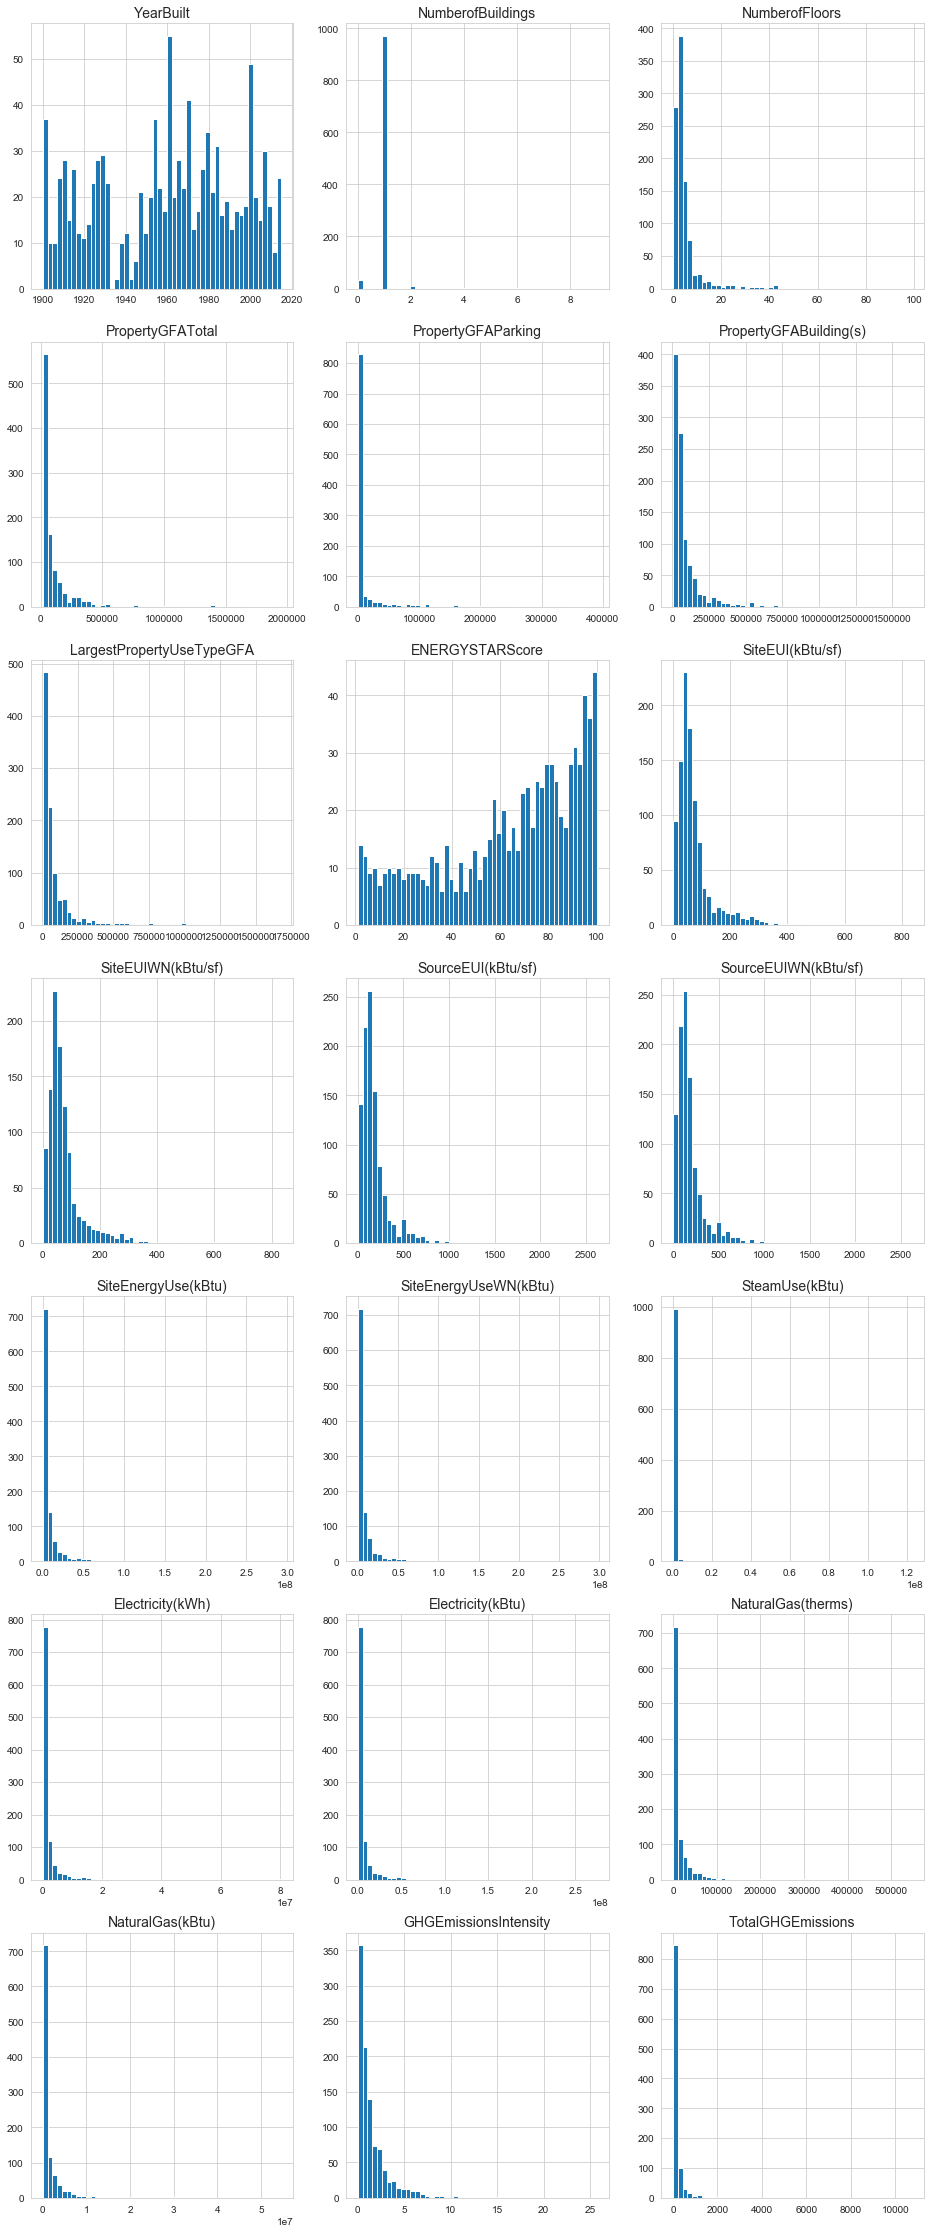

In [105]:
fig = plt.figure(figsize=(16,40))
for feat_idx in range(data_quanti.shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.hist(data_quanti.iloc[:, feat_idx], bins=50)
    ax.set_title(data_quanti.columns[feat_idx], fontsize=14)

##### YearBuilt

Description : Year in which a property was constructed or underwent a complete renovation.

La figure ci-dessous représente l'année de construction de bâtiment en fonction de district.

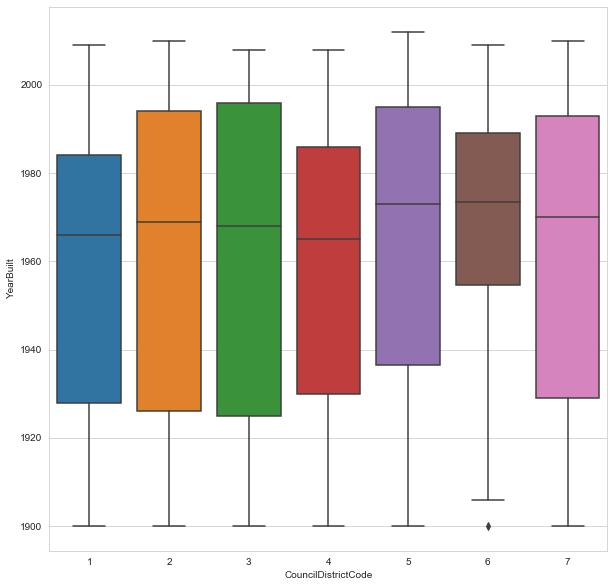

In [106]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x=data['CouncilDistrictCode'], y=data2015['YearBuilt'])

##### NumberofBuildings 

Description : Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report. 

In [107]:
data['NumberofBuildings'].value_counts()

1.0    970
0.0     31
2.0      8
3.0      4
5.0      3
4.0      2
6.0      2
9.0      1
Name: NumberofBuildings, dtype: int64

Dans la partie suivante, les données quantitatives sont représentées en fonction de district.

##### PropertyGFATotal 

Description : Total building and parking gross floor area.

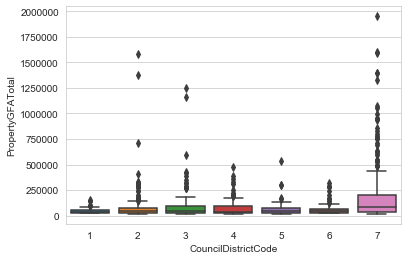

In [108]:
ax = sns.boxplot(x="CouncilDistrictCode", y="PropertyGFATotal", data=data)

##### PropertyGFAParking 

Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).

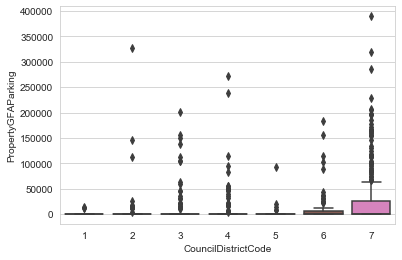

In [109]:
ax = sns.boxplot(x="CouncilDistrictCode", y="PropertyGFAParking", data=data)

##### PropertyGFABuilding(s)

Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.

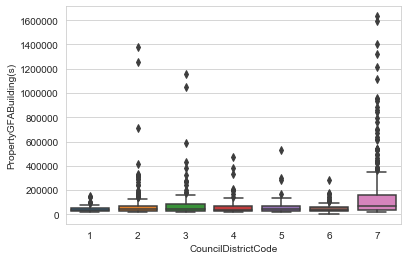

In [110]:
ax = sns.boxplot(x="CouncilDistrictCode", y="PropertyGFABuilding(s)", data=data)

##### LargestPropertyUseTypeGFA 

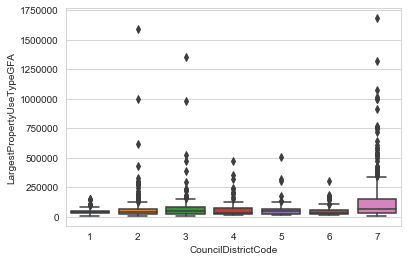

In [111]:
ax = sns.boxplot(x="CouncilDistrictCode", y="LargestPropertyUseTypeGFA", data=data)

##### ENERGYSTARScore 

An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.

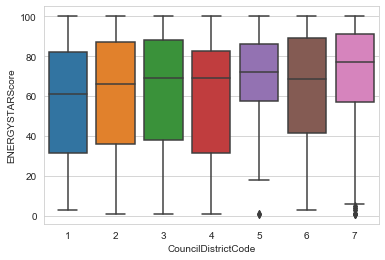

In [112]:
ax = sns.boxplot(x="CouncilDistrictCode", y="ENERGYSTARScore", data=data)

#####  SiteEUI(kBtu/sf)

Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.

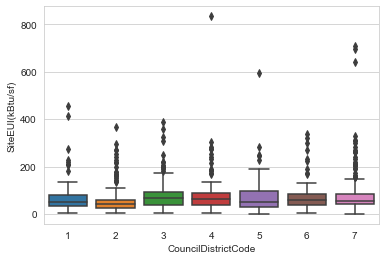

In [113]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SiteEUI(kBtu/sf)", data=data)

##### SiteEUIWN(kBtu/sf)

Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

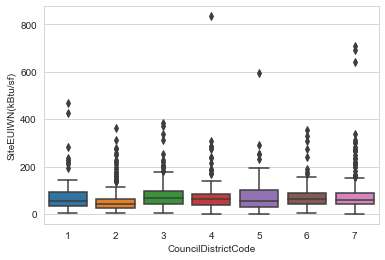

In [114]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SiteEUIWN(kBtu/sf)", data=data)

##### SourceEUI(kBtu/sf)

Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

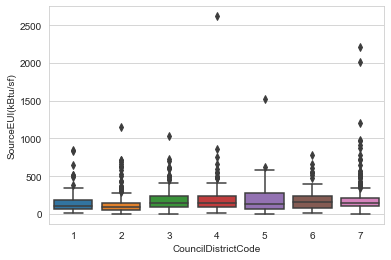

In [115]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SourceEUI(kBtu/sf)", data=data)

#####  SourceEUIWN(kBtu/sf)

Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

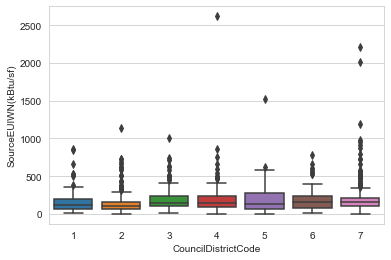

In [116]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SourceEUIWN(kBtu/sf)", data=data)

##### SiteEnergyUseWN(kBtu) 

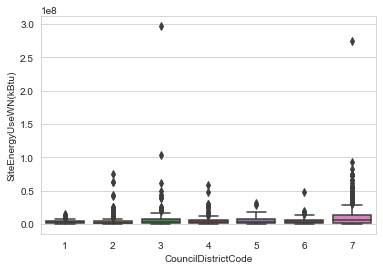

In [117]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SiteEnergyUseWN(kBtu)", data=data)

###### SteamUse(kBtu) 

The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).

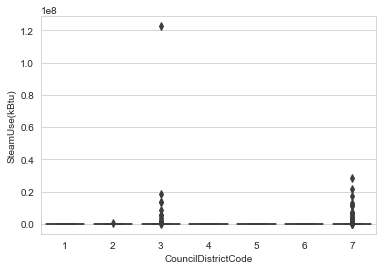

In [118]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SteamUse(kBtu)", data=data)

Le même graphique sans outliers :

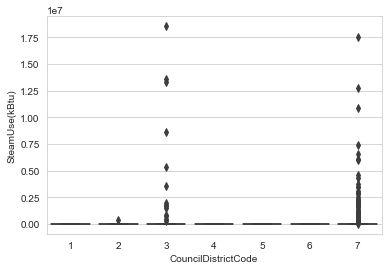

In [119]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SteamUse(kBtu)", data=data_no_out)

###### Electricity(kWh)

The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.

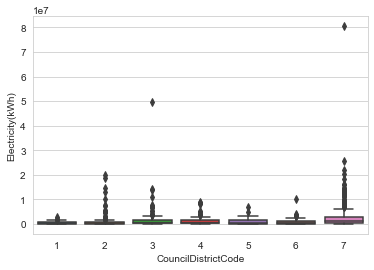

In [120]:
ax = sns.boxplot(x="CouncilDistrictCode", y="Electricity(kWh)", data=data)

Le même graphique sans outliers :

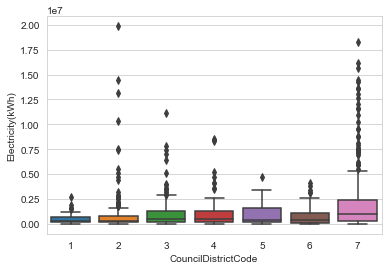

In [121]:
ax = sns.boxplot(x="CouncilDistrictCode", y="Electricity(kWh)", data=data_no_out)

#####  Electricity(kBtu)

The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

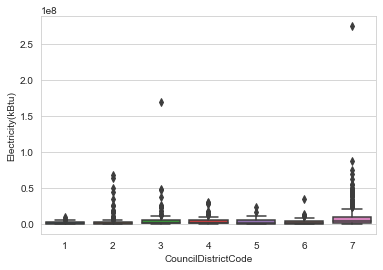

In [122]:
ax = sns.boxplot(x="CouncilDistrictCode", y="Electricity(kBtu)", data=data)

Sans outliers :

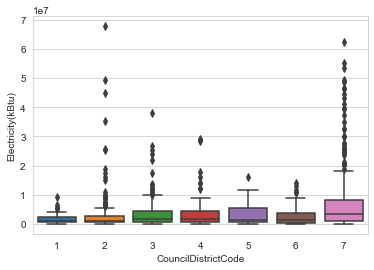

In [123]:
ax = sns.boxplot(x="CouncilDistrictCode", y="Electricity(kBtu)", data=data_no_out)

##### NaturalGas(therms) 

Description : The annual amount of utility-supplied natural gas consumed by the property, measured in therms.

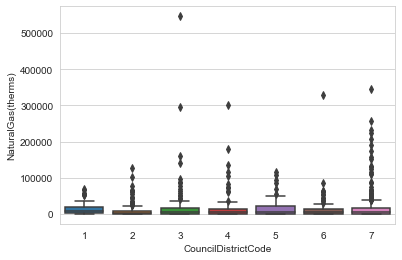

In [124]:
ax = sns.boxplot(x="CouncilDistrictCode", y="NaturalGas(therms)", data=data)

Sans outliers :

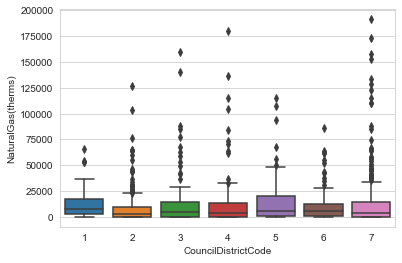

In [125]:
ax = sns.boxplot(x="CouncilDistrictCode", y="NaturalGas(therms)", data=data_no_out)

##### NaturalGas(kBtu) 

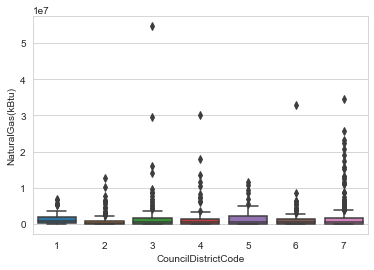

In [126]:
ax = sns.boxplot(x="CouncilDistrictCode", y="NaturalGas(kBtu)", data=data)

Sans outliers :

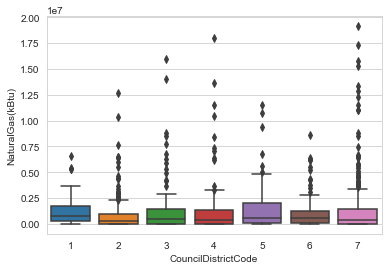

In [127]:
ax = sns.boxplot(x="CouncilDistrictCode", y="NaturalGas(kBtu)", data=data_no_out)

#####  TotalGHGEmissions = variable cible A

Description : The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu. 

###### Emissions de CO2 en fonction de district 

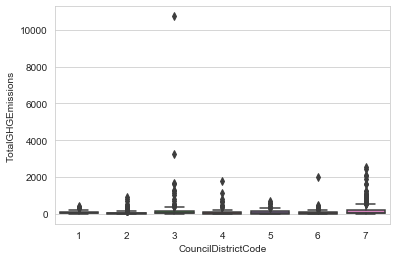

In [128]:
ax = sns.boxplot(x="CouncilDistrictCode", y="TotalGHGEmissions", data=data)

La même représentation sans outliers :

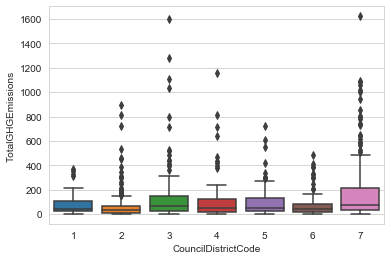

In [129]:
ax = sns.boxplot(x="CouncilDistrictCode", y="TotalGHGEmissions", data=data_no_out)

###### Emissions de CO2 en fonction de l'âge de bâtiment 

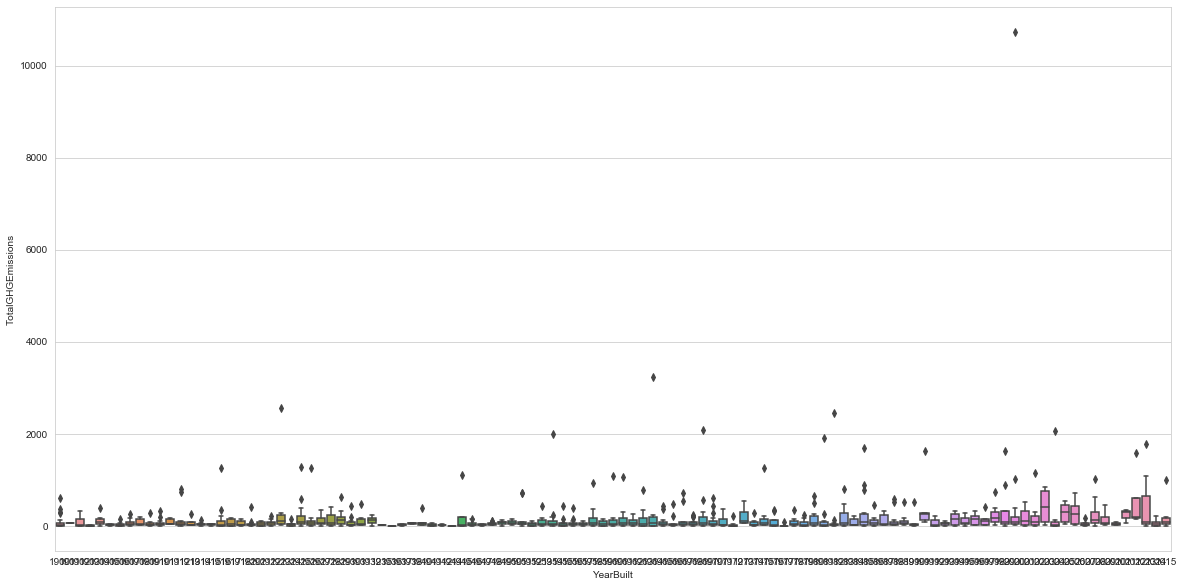

In [130]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="YearBuilt", y="TotalGHGEmissions", data=data)

La même figure sans outliers :

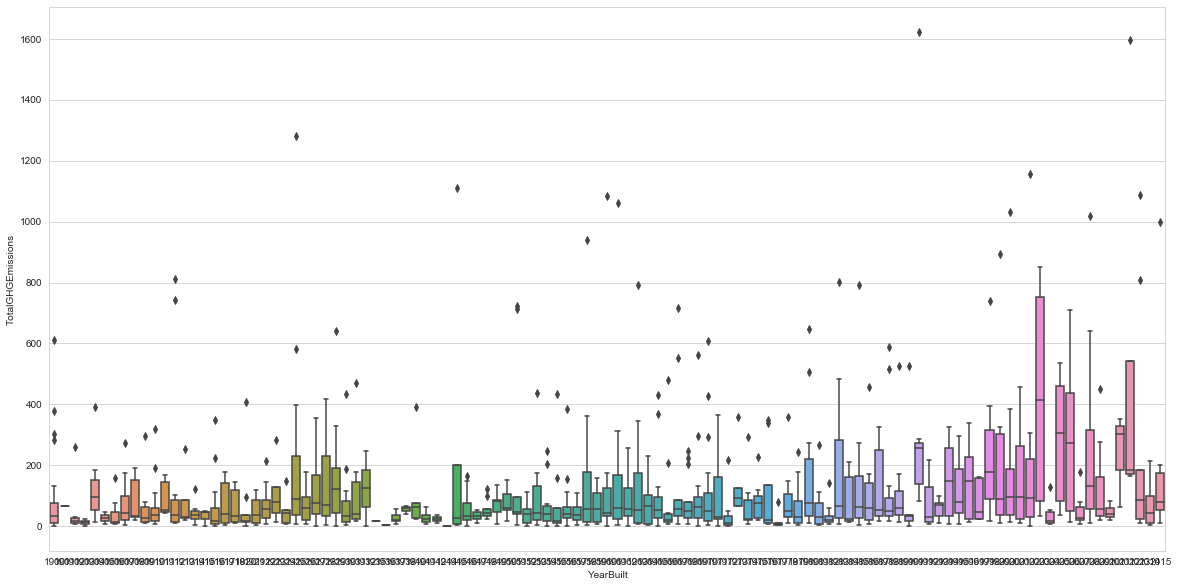

In [131]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="YearBuilt", y="TotalGHGEmissions", data=data_no_out)

Nous observons plus d'émissions de CO2 dans le bâtiments plus récentes.

###### Emissions de CO2 en fonction de Energy Star Score 

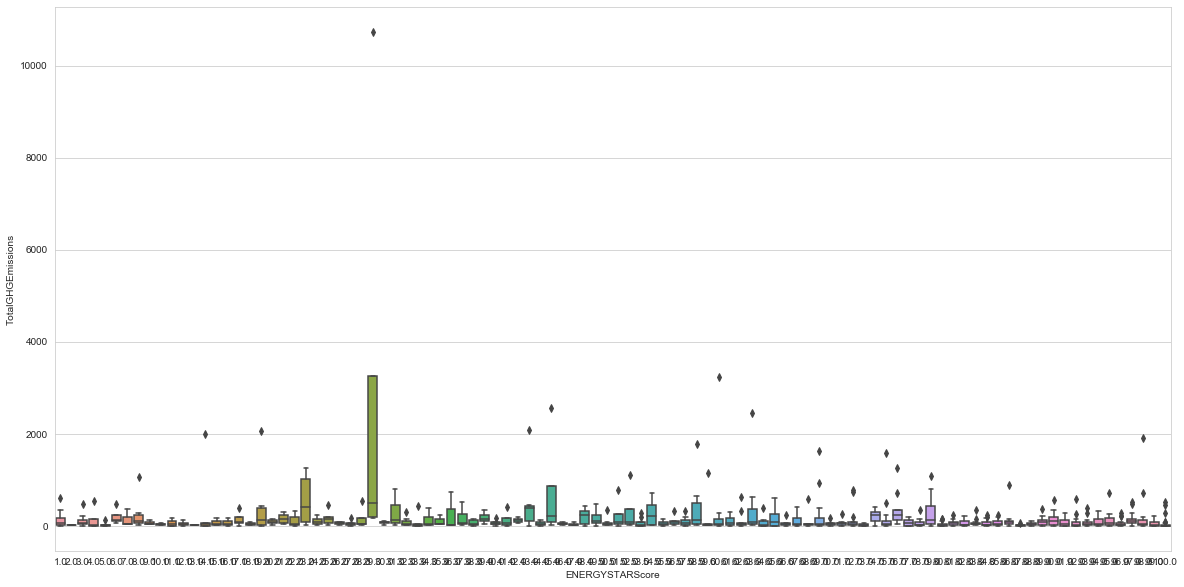

In [132]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ENERGYSTARScore", y="TotalGHGEmissions", data=data)

La même figure sans outliers :

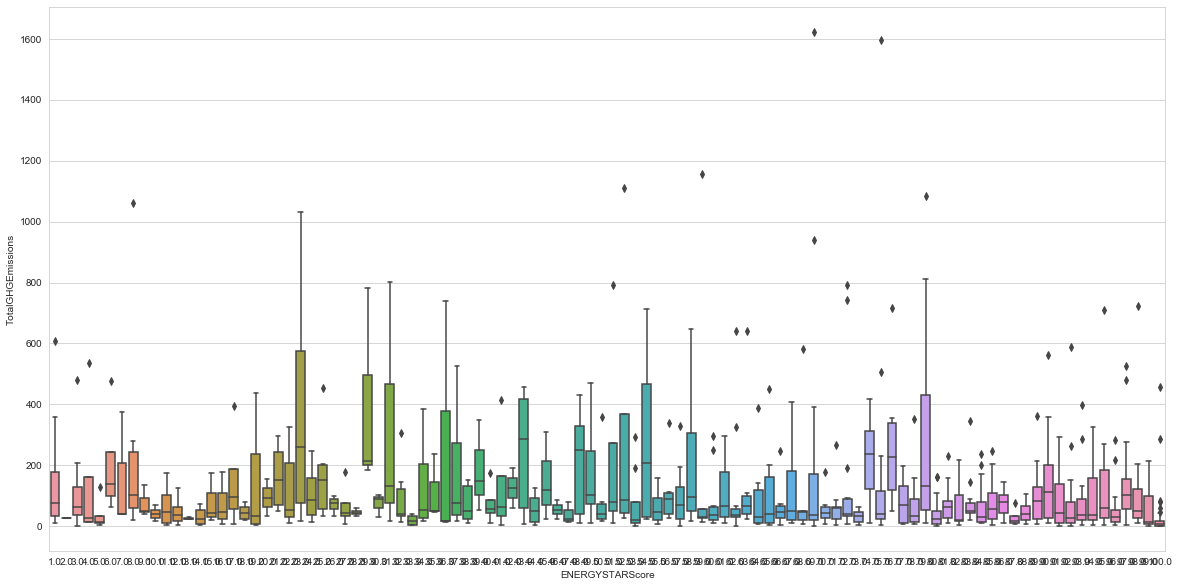

In [133]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ENERGYSTARScore", y="TotalGHGEmissions", data=data_no_out)

La visualisation d'émissions de CO2 en fonction de niveau d'Energy Star Score ne démontre pas une influence de score sur la variable cible.  

###### Visualisation d'émissions de CO2 sur une carte

In [134]:
neigh_geo = f'https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/city-council-districts.geojson'

In [135]:
group1 = data['TotalGHGEmissions'].groupby(data['CouncilDistrictCode'])
emissions = DataFrame(group1.mean())

In [136]:
emissions['district'] = emissions.index

In [137]:
carte = folium.Map(location=[47.6062095,-122.3320708], zoom_start=11)

folium.Choropleth(
    geo_data=neigh_geo,
    name='choropleth',
    data=emissions,
    columns=['district', 'TotalGHGEmissions'],
    key_on='properties.district',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Emissions CO2'
).add_to(carte)

folium.LayerControl().add_to(carte)

carte



Nous pouvons voir que les bâtiments dans le district 3 et 7 produisent plus d'émissions de CO2 que dans les autes districts. 

In [138]:
carte.save('Figures/emissionsCO2_par_district.html')

In [139]:
carte.save('Figures/emissionsCO2_par_district.png')

La figure suivante représente les émissions en fonction de surface de bâtiment. Les points sont placés selon leur coordonnées géographiques.

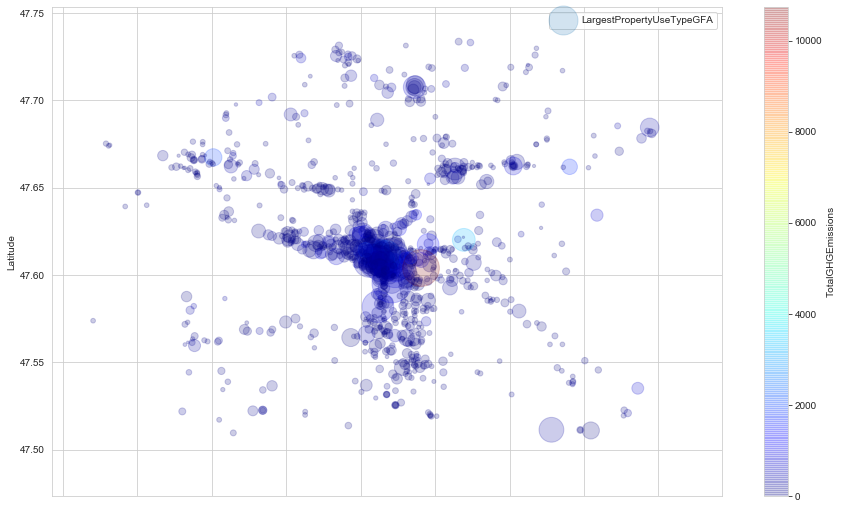

In [140]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2,
    s=data["LargestPropertyUseTypeGFA"]/1000, label="LargestPropertyUseTypeGFA", figsize=(15,9),
    c="TotalGHGEmissions", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Sans outliers :

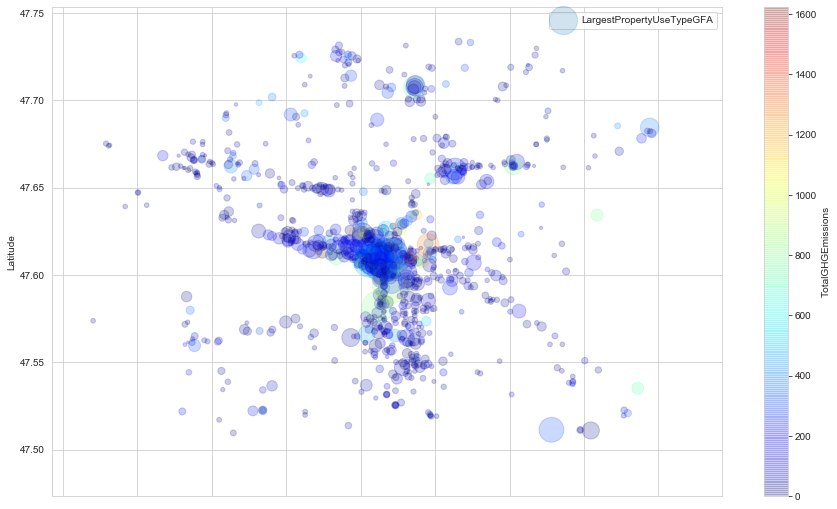

In [141]:
data_no_out.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2,
    s=data_no_out["LargestPropertyUseTypeGFA"]/1000, label="LargestPropertyUseTypeGFA", figsize=(15,9),
    c="TotalGHGEmissions", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

#####  GHGEmissionsIntensity 

Description : Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

Données sans outliers :

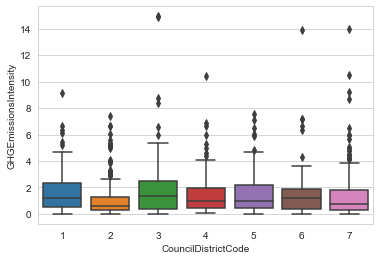

In [142]:
ax = sns.boxplot(x="CouncilDistrictCode", y="GHGEmissionsIntensity", data=data_no_out)

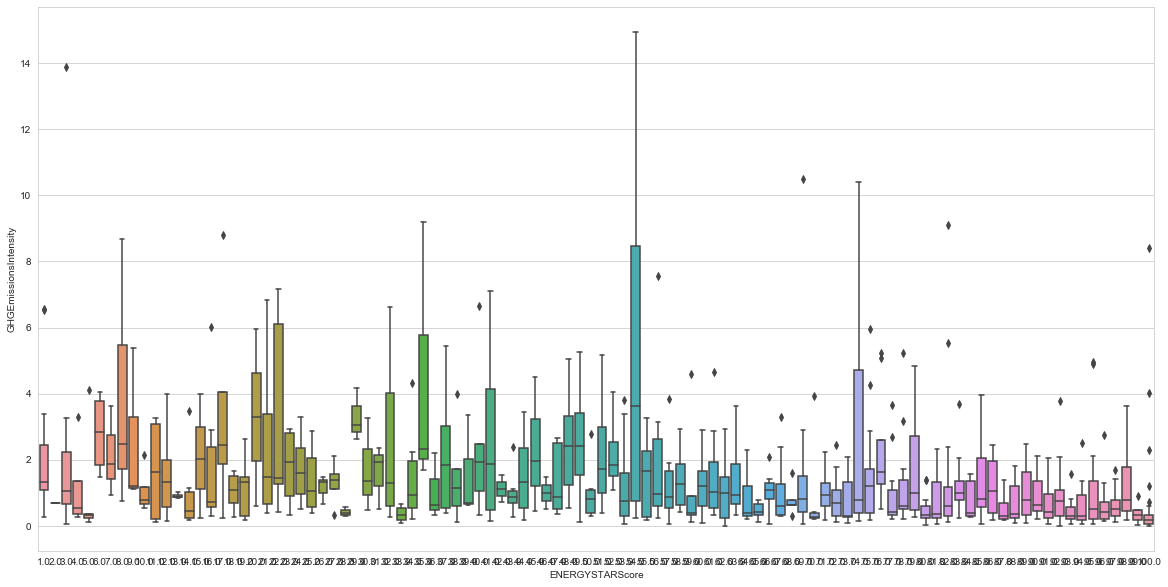

In [143]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ENERGYSTARScore", y="GHGEmissionsIntensity", data=data_no_out)

##### SiteEnergyUse(kBtu) = Variable cible  B

The annual amount of energy consumed by the property from all sources of energy.

###### Consommation d'énergie en fonction de district 

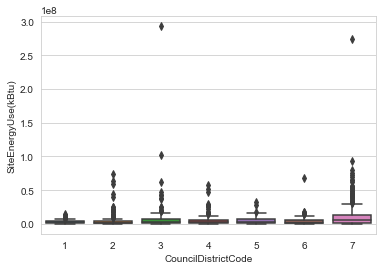

In [144]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SiteEnergyUse(kBtu)", data=data)

Sans outliers :

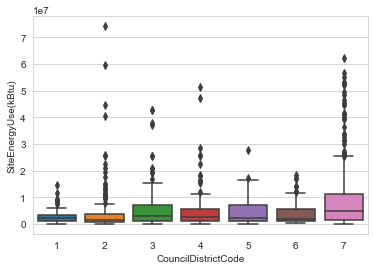

In [145]:
ax = sns.boxplot(x="CouncilDistrictCode", y="SiteEnergyUse(kBtu)", data=data_no_out)

###### Consommation d'énergie en fonction de l'âge de bâtiment 

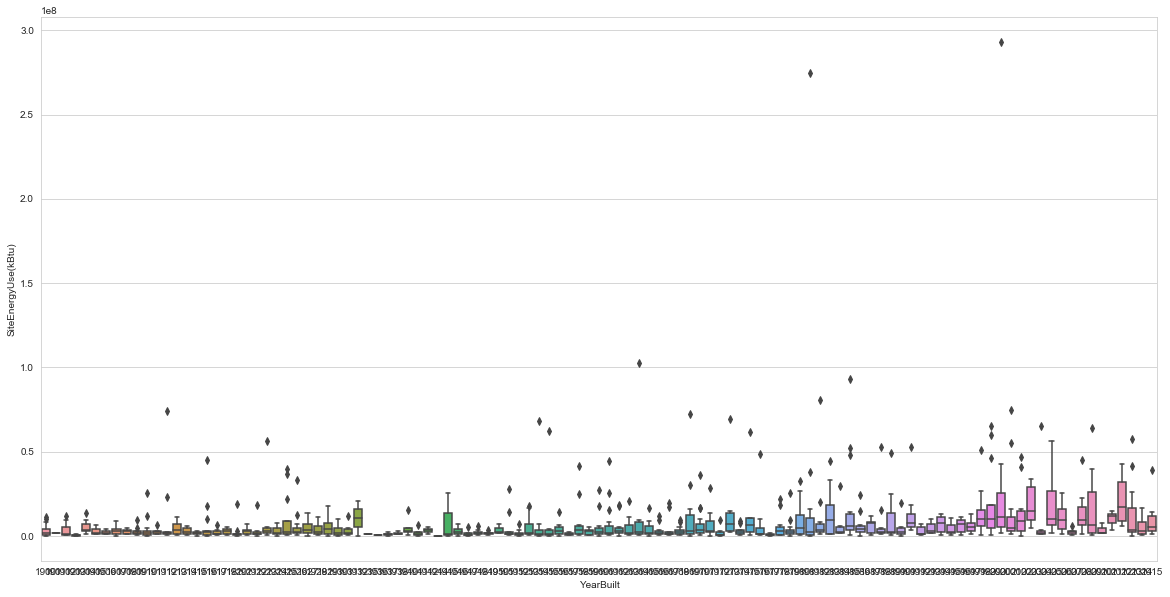

In [146]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="YearBuilt", y="SiteEnergyUse(kBtu)", data=data)

Sans outliers :

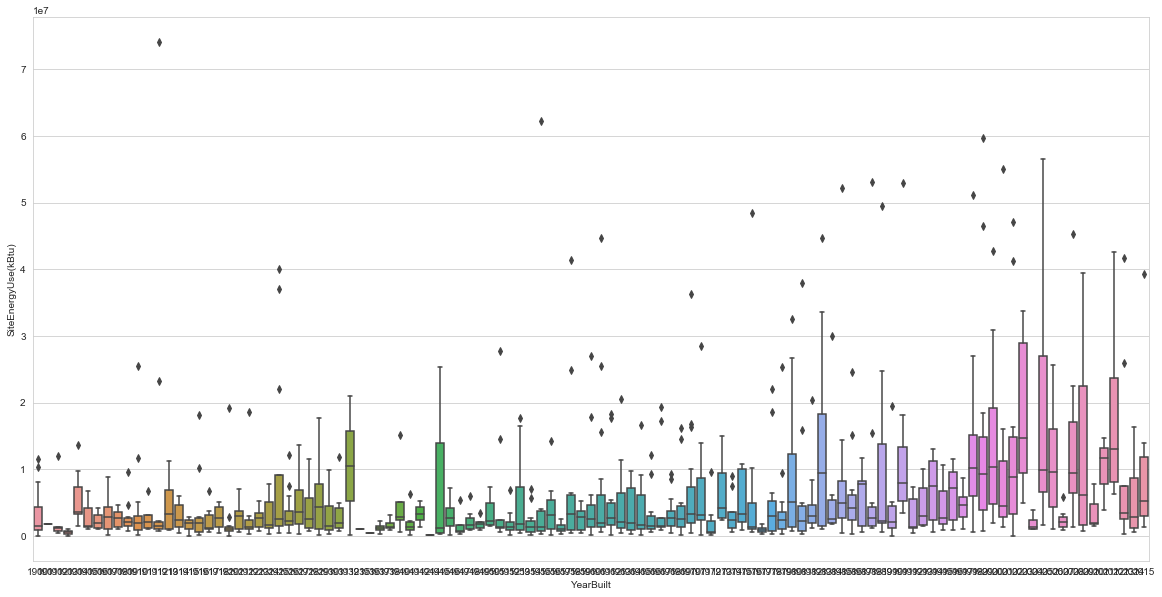

In [147]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="YearBuilt", y="SiteEnergyUse(kBtu)", data=data_no_out)

Nous pouvons observer que les bâtiments plus récents consomment plus d'énergie.

###### Consommation d'énergie en fonction d'Energy Star Score

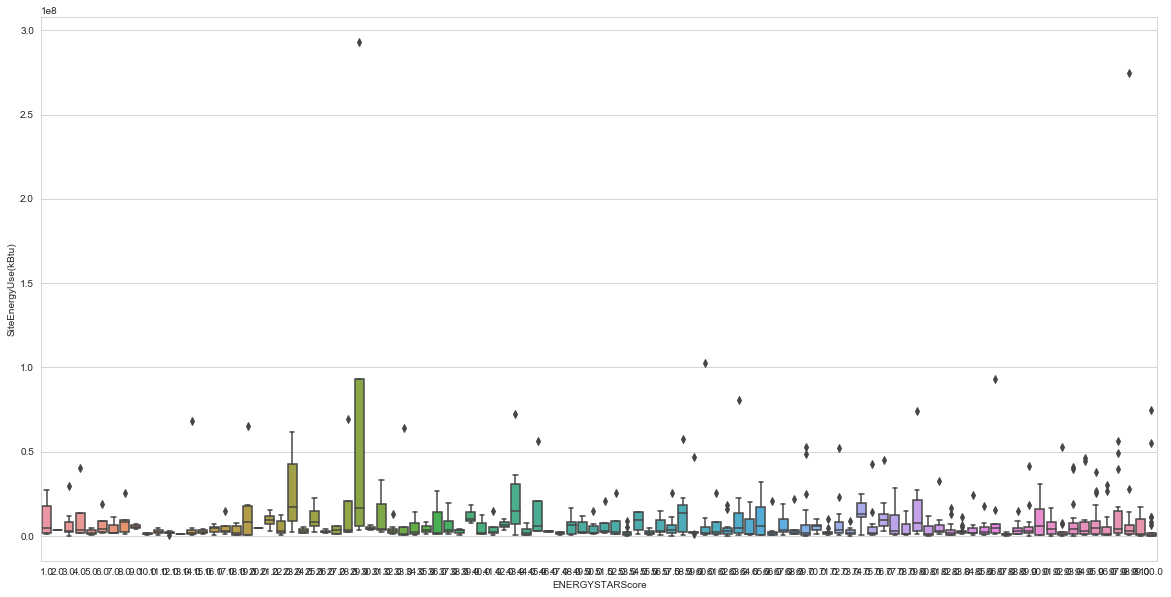

In [148]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ENERGYSTARScore", y="SiteEnergyUse(kBtu)", data=data)

Sans outliers :

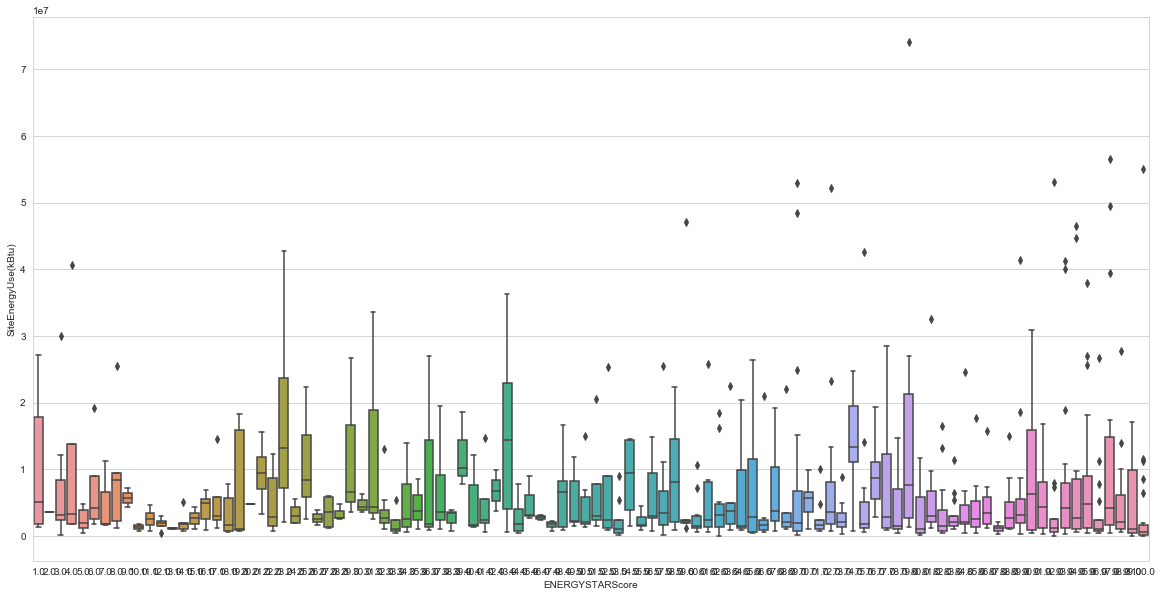

In [149]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ENERGYSTARScore", y="SiteEnergyUse(kBtu)", data=data_no_out)

La visualisation de consommation d'énergie en fonction de niveau d'Energy Star Score ne démontre pas une influence de score sur la variable cible. 

###### Visualisation de consommation d'énergie sur une carte 

In [150]:
distr_geo = f'https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/city-council-districts.geojson'

In [151]:
group2 = data['SiteEnergyUse(kBtu)'].groupby(data['CouncilDistrictCode'])
consommation = DataFrame(group2.mean())

In [152]:
consommation['district'] = consommation.index

In [153]:
consommation['energy_k']=round(consommation['SiteEnergyUse(kBtu)']/1000)

In [154]:
carte2 = folium.Map(location=[47.6062095,-122.3320708], zoom_start=11)

folium.Choropleth(
    geo_data=distr_geo,
    name='choropleth',
    data=consommation,
    columns=['district', 'energy_k'],
    key_on='properties.district',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Consommation d énergie en k kBtu'
).add_to(carte2)

folium.LayerControl().add_to(carte2)

carte2

Nous pouvons voir que les bâtiments dans les districts 3 et 7 consomment le plus d'énergie.

In [155]:
carte2.save('Figures/consommation_par_district.html')

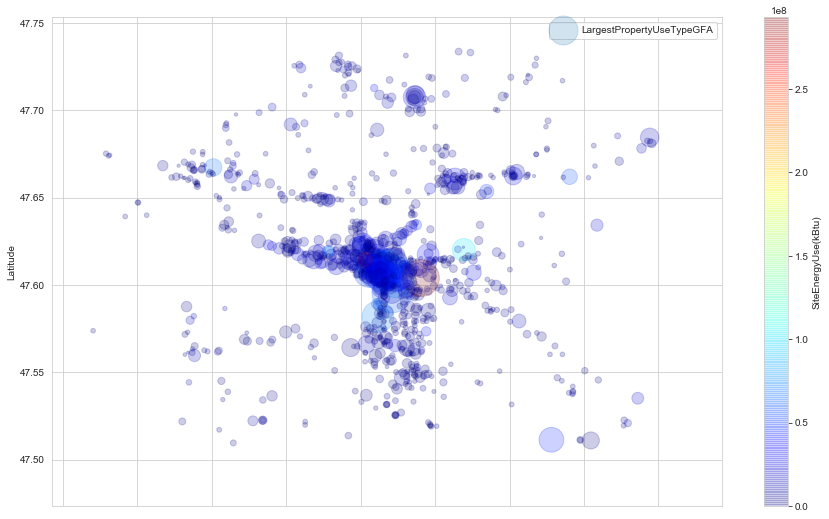

In [156]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2,
    s=data["LargestPropertyUseTypeGFA"]/1000, label="LargestPropertyUseTypeGFA", figsize=(15,9),
    c="SiteEnergyUse(kBtu)", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

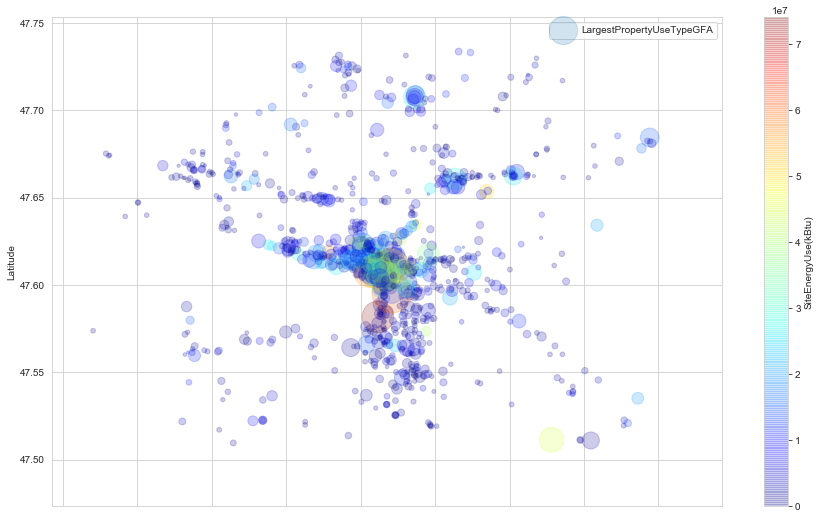

In [157]:
data_no_out.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2,
    s=data_no_out["LargestPropertyUseTypeGFA"]/1000, label="LargestPropertyUseTypeGFA", figsize=(15,9),
    c="SiteEnergyUse(kBtu)", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

#### 3.2.1 Analyse de corrélations 

Nous allons regarder les liens entre les variables quantitatives à l'aide d'une analyse de corrélations.

Nous avons choisi d'analyser uniquement un choix de variables (notamment pour une meilleure lisibilité de graphique). Chaque caractéristique (année construction, localisation, taille de bâtiment, surface) est représentée par une variable. Les données de consommation sont non-normalisées par rapport à météo et dans les unités kBtu.

Nous avons performé les analyses sur le jeu de données sans outliers pour avoir une meilleure lisibilité graphique. En effet, étant donné que certaines valeurs sont très élevées, les graphiques ont tendance d'être écrasés vers le bas.


##### 3.2.1.1 Jeu de données complet 

In [158]:
data_quanti=data_no_out[['YearBuilt',
                      'ZipCode',
                      'NumberofFloors', 
                      'LargestPropertyUseTypeGFA', 
                      'ENERGYSTARScore', 
                      'SiteEUI(kBtu/sf)', 
                      'SourceEUI(kBtu/sf)',
                      'SiteEnergyUse(kBtu)', 
                      'SteamUse(kBtu)', 
                      'Electricity(kBtu)', 
                      'NaturalGas(kBtu)',
                      'TotalGHGEmissions'
                     ]]

In [159]:
data_quanti.dropna(inplace=True)

In [160]:
data_quanti.shape

(789, 12)

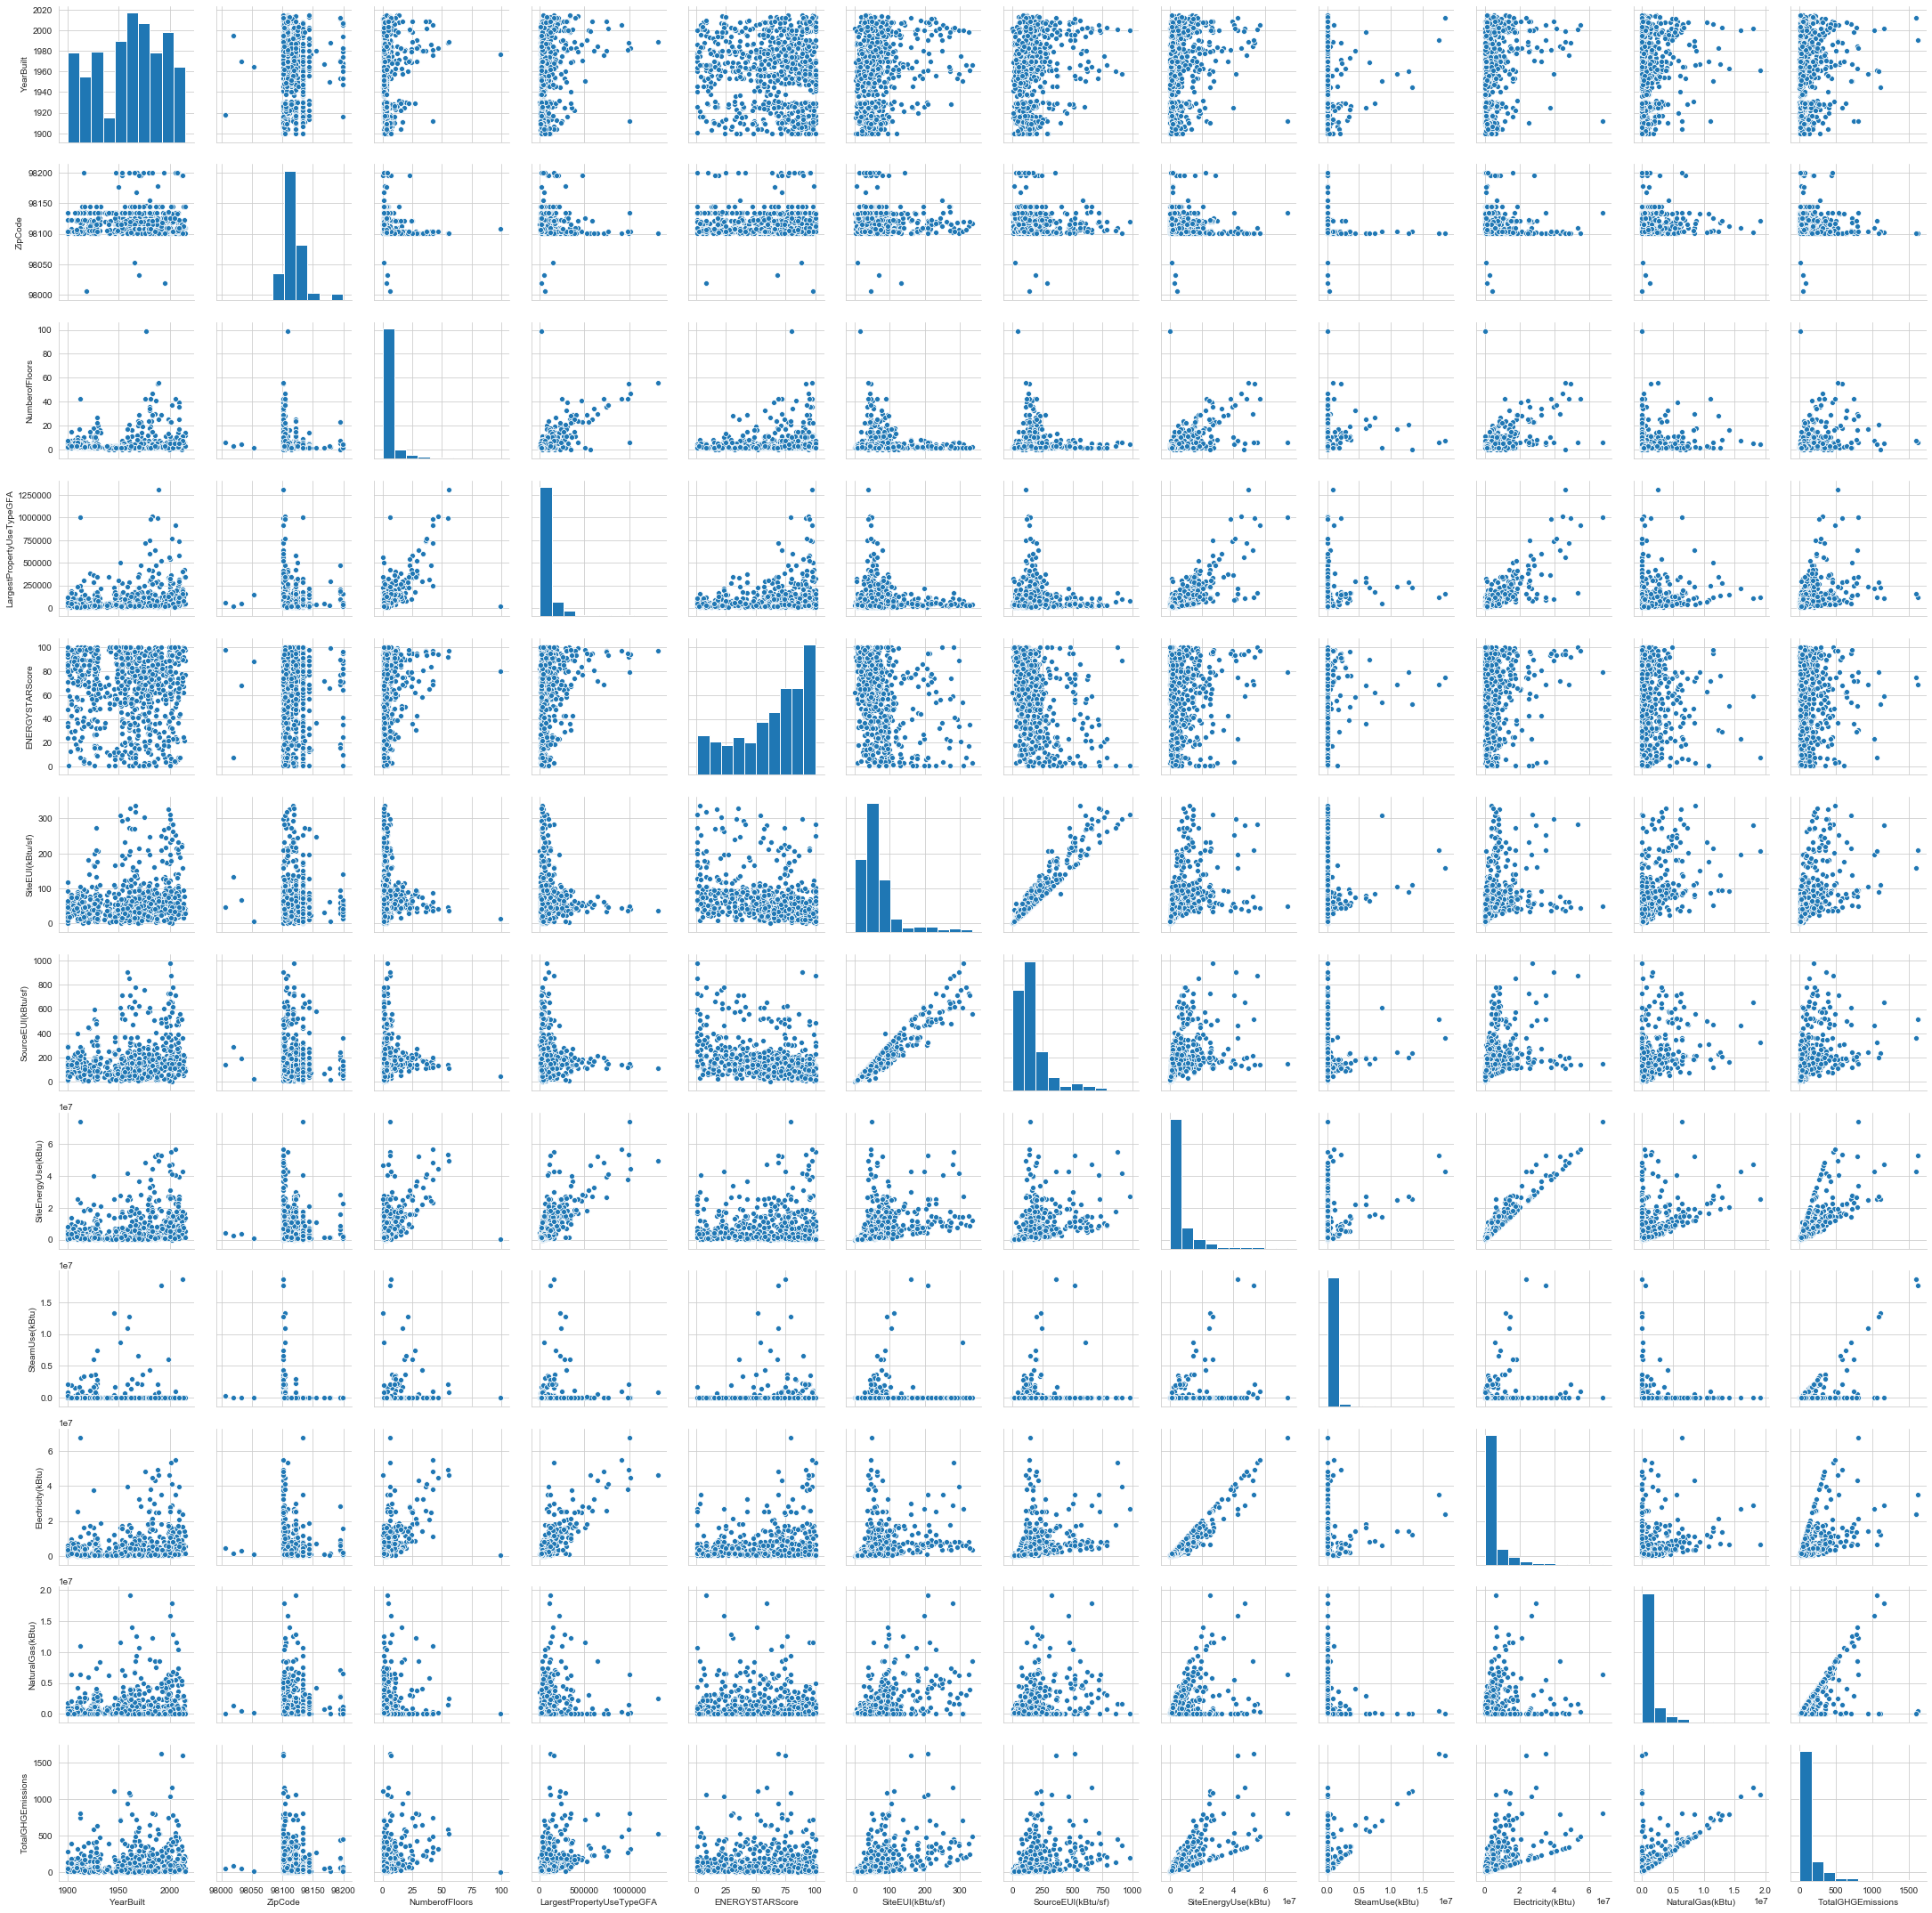

In [161]:
sns.pairplot(data_quanti, kind="scatter")

Nous pouvons identifier un lien linéaire entre les variables suivantes :

LargestPropertyGFA - NumberofFloors

SiteEnergyUse(kBtu) - NumberofFloors et Electricity(kBtu)

Electricity(kBtu) - NumberofFloors

SiteEUI(kBtu/sf) - SourceEUI(kBtu/sf)

TotalGHGEmissions - SiteEnergyUse(kBtu), Electricity(kBtu), SteamUse(kBtu), NaturalGas(kBtu)

Le graphique suivant représente les corrélations entre les variables qui représentent les différentes mesures de surface :

Text(0.5, 1.0, 'Corrélation entre Site EUI et Source EUI')

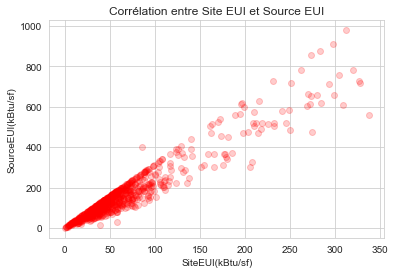

In [162]:
plt.scatter(data_quanti['SiteEUI(kBtu/sf)'], data_quanti['SourceEUI(kBtu/sf)'], color='red', alpha=0.2)

plt.ylabel('SourceEUI(kBtu/sf)')
plt.xlabel('SiteEUI(kBtu/sf)')
plt.title('Corrélation entre Site EUI et Source EUI')

Text(0.5, 1.0, "Corrélation entre les émissions de CO2 et la consommation d'énergie")

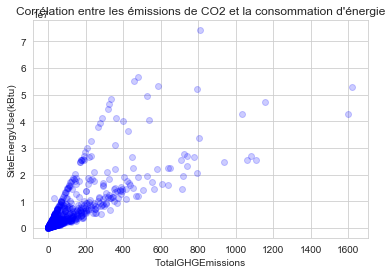

In [163]:
plt.scatter(data_quanti['TotalGHGEmissions'], data_quanti['SiteEnergyUse(kBtu)'], color='blue', alpha=0.2)

plt.xlabel('TotalGHGEmissions')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.title("Corrélation entre les émissions de CO2 et la consommation d'énergie")

Text(0.5, 1.0, 'Corrélation entre les émissions de CO2 et le score ENERGY STAR')

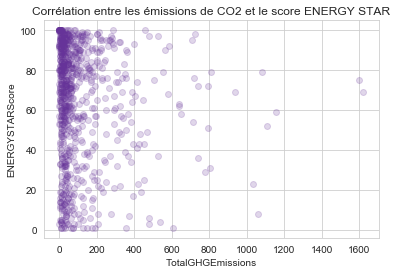

In [164]:
plt.scatter(data_quanti['TotalGHGEmissions'], data_quanti['ENERGYSTARScore'], color='rebeccapurple', alpha=0.2)

plt.xlabel('TotalGHGEmissions')
plt.ylabel('ENERGYSTARScore')
plt.title("Corrélation entre les émissions de CO2 et le score ENERGY STAR")

Text(0.5, 1.0, "Corrélation entre la consommation d'énergie et le score ENERGY STAR")

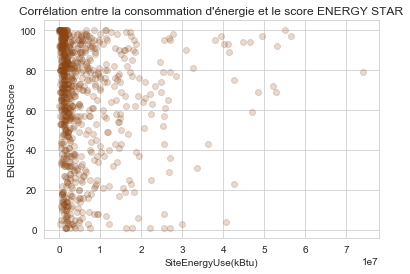

In [165]:
plt.scatter(data_quanti['SiteEnergyUse(kBtu)'], data_quanti['ENERGYSTARScore'], color='saddlebrown', alpha=0.2)

plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('ENERGYSTARScore')
plt.title("Corrélation entre la consommation d'énergie et le score ENERGY STAR")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BE834A8>,
      dtype=object)

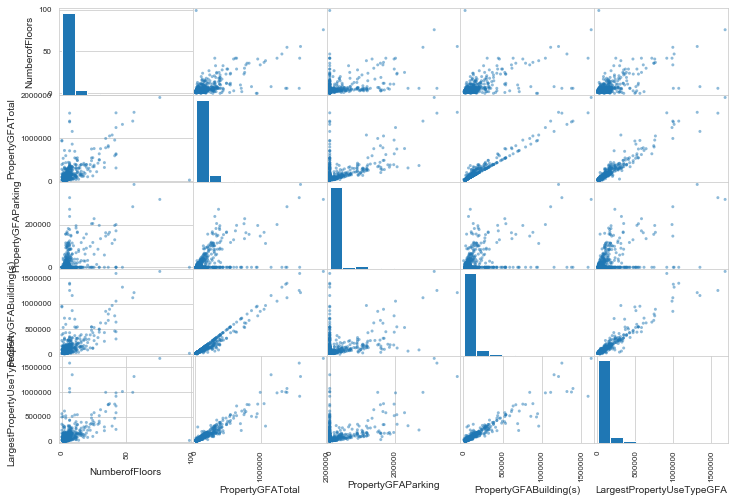

In [166]:
from pandas.plotting import scatter_matrix

attributes = ["NumberofFloors", "PropertyGFATotal", "PropertyGFAParking",
              "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"]
scatter_matrix(data[attributes], figsize=(12, 8))

Nous pouvons observer que toutes les variables sont fortement corrélées entre elles. Deuxième conclusion : certaines bâtiments n'ont pas de parking (beaucoup de valeurs de surface de parking sont égales à 0). 

Nous allons donc choisir uniquement une des variables surface (LargestPropertyUseType) pour la modélisation. 

Nous allons utiliser la variable PropertyGFAParking pour créer une nouvelle variable "Parking" qui indique si le bâtiment possède un parking ou non (chap. 4.3.2). 

Nous allons aussi calculer une variable qui indique une proportion de la surface de bâtiments sur la surface totale (chap. 4.3.3).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C7E3E80>,
      dtype=object)

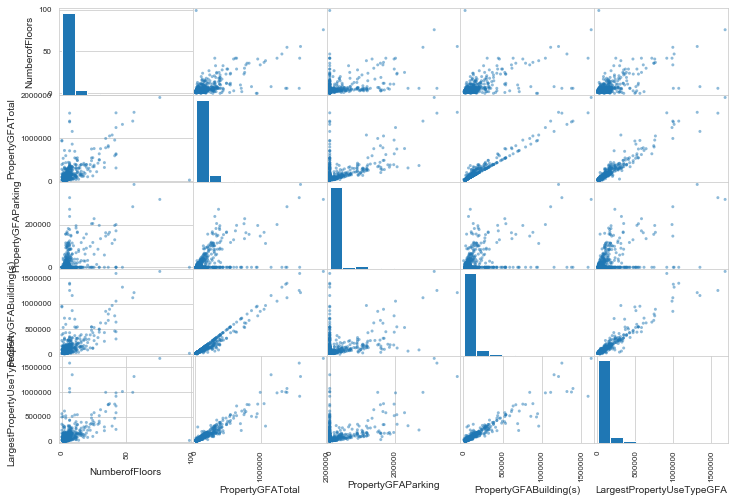

In [167]:
from pandas.plotting import scatter_matrix

attributes = ["NumberofFloors", "PropertyGFATotal", "PropertyGFAParking",
              "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [168]:
def analyse_cor(data,var_test,*args):
    """Fonction qui prend en argument un DataFrame, variable d'intérêt et une liste de variables 
    à analyser et retourne un tableau avec R2 et p-valeur pour chaque variable à analyser. 
    
    ATTENTION !  La fonction prend en compte uniquement les observations sans valeurs manquantes.
    
    Entrées :
    
        - data = DataFrame
        - var_test = variable d'intérêt
        - *args = liste de variables que nous souhaitons croiser avec la variable d'intérêt afin de voir leurs corrélations.
    
    Sorties :
    
        - un DataFrame qui contient R2 et p-valeur pour chaque variable présente dans la liste de *args
    """
    df=DataFrame(columns=['R2', 'p'])
    
    data=data.dropna()
  
    for var in args:
    
        cor= stats.pearsonr(data[var_test], data[var])
    
        R2 = round(cor[0], 2)
        p = cor[1]
    
        ser= Series({'R2':R2, 'p':p})
        ser.name=var
        df=df.append(ser)
    return df

######  Variable TotalGHGEmissions

In [169]:
analyse_cor(data_quanti, 'TotalGHGEmissions', 'YearBuilt',
                      'ZipCode',
                      'NumberofFloors', 
                      'LargestPropertyUseTypeGFA', 
                      'ENERGYSTARScore', 
                      'SiteEUI(kBtu/sf)', 
                      'SourceEUI(kBtu/sf)',
                      'SiteEnergyUse(kBtu)', 
                      'SteamUse(kBtu)', 
                      'Electricity(kBtu)', 
                      'NaturalGas(kBtu)' )

R2              p
YearBuilt                  0.17   2.095109e-06
ZipCode                   -0.10   3.269741e-03
NumberofFloors             0.34   1.173101e-22
LargestPropertyUseTypeGFA  0.44   7.801578e-39
ENERGYSTARScore           -0.08   2.637701e-02
SiteEUI(kBtu/sf)           0.50   2.651345e-50
SourceEUI(kBtu/sf)         0.41   4.760960e-33
SiteEnergyUse(kBtu)        0.77  2.111335e-155
SteamUse(kBtu)             0.61   5.695438e-83
Electricity(kBtu)          0.58   2.786500e-71
NaturalGas(kBtu)           0.70  1.384378e-117

La première variable cible, TotalGHGEmissions est fortement corrélée avec la variable SiteEnergyUse (R2 = 0.78) et NaturalGas(kBtu) (R2 = 0.75). Il existe aussi un lien avec la consommation d'éléctricité et SteamUse (R2 = 0.59 et 0.56).

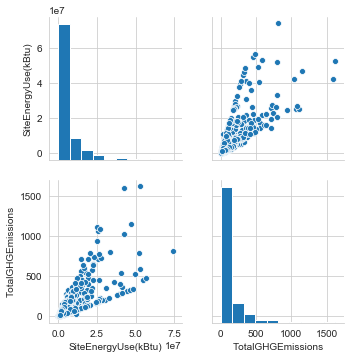

In [170]:
sns.pairplot(data_quanti[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']], kind="scatter")

######  Variable SiteEnergyUse(kBtu)

In [171]:
analyse_cor(data_quanti, 'SiteEnergyUse(kBtu)',
                      'TotalGHGEmissions', 
                      'YearBuilt',
                      'ZipCode',
                      'NumberofFloors', 
                      'LargestPropertyUseTypeGFA', 
                      'ENERGYSTARScore', 
                      'SiteEUI(kBtu/sf)', 
                      'SourceEUI(kBtu/sf)', 
                      'SteamUse(kBtu)', 
                      'Electricity(kBtu)', 
                      'NaturalGas(kBtu)' )

R2              p
TotalGHGEmissions          0.77  2.111335e-155
YearBuilt                  0.26   1.140603e-13
ZipCode                   -0.12   6.129726e-04
NumberofFloors             0.56   3.095836e-67
LargestPropertyUseTypeGFA  0.79  3.580075e-167
ENERGYSTARScore            0.00   9.030503e-01
SiteEUI(kBtu/sf)           0.41   6.843675e-34
SourceEUI(kBtu/sf)         0.45   1.503439e-40
SteamUse(kBtu)             0.31   1.013142e-18
Electricity(kBtu)          0.96   0.000000e+00
NaturalGas(kBtu)           0.44   4.098038e-39

Deuxième variable cible est très fortement corrélée avec la consommation d'électricité (R2 = 0.96). Il existe aussi une corrélation assez importante avec TotalGHGEmissions (R2 = 0.78) et la surface (LargestPropertyUseTypeGFA, R2 = 0.81 + NumberofFloors, R2=0.65).

# 4. Préparer les données pour la modélisation

## 4.1 Cleaning 

### 4.1.1 Gestion d'outliers 

Dans un premier temps, nous allons regarder combien de outliers nous avons dans notre jeu de données :

In [172]:
print("Les données contient", data.shape[0]-data_no_out.shape[0], "observations avec des outliers, ce qui représente", 
      round((data.shape[0]-data_no_out.shape[0])*100/data.shape[0]),"% de données." )

Les données contient 22 observations avec des outliers, ce qui représente 2 % de données.


Il existe plusieurs stratégies pour gérer les outliers. On pourra envisager :

**1. Exclure les observations avec des outliers**

Etant donné que notre jeu de données n'est pas très grand, enlever 2% de données d'entraînement ne paraît pas pertinent.

**2. Découper les variables numériques en classes**


**3. Transformer les variables**

Nous allons opter pour cette technique, car les variables cible sont de toute façon aplaties vers la gauche. Une transformation logarithmique nous permettra d'obtenir une distribution qui se rapproche plus à une distribution gaussienne, ce qui est une condition pour certains modèles.

Les variables de consommation d'énergies qui contient aussi un nombre d'outliers vont être transformées en variables qualitatives :

- 0 / 1 pour exprimer si le bâtiment utilise une telle source d'énergie

Et quantitatives de type proportion :

- prop qui exprime une proportion d'utilisation de type d'énergie

Ces transformations vont atténuer l'effet d'outliers dans les analyses.


Nous allons enlever toutes les variables utilisées pour flagger des outliers de notre jeu de données : 

In [173]:
data.drop( ['SiteEUI(kBtu/sf)_outlier', 'SiteEUIWN(kBtu/sf)_outlier',
       'SourceEUI(kBtu/sf)_outlier', 'SourceEUIWN(kBtu/sf)_outlier',
       'SiteEnergyUse(kBtu)_outlier', 'SiteEnergyUseWN(kBtu)_outlier',
       'SteamUse(kBtu)_outlier', 'Electricity(kWh)_outlier',
       'Electricity(kBtu)_outlier', 'NaturalGas(therms)_outlier',
       'NaturalGas(kBtu)_outlier', 'TotalGHGEmissions_outlier'], axis=1, inplace=True)

Nous avons remarqués que 2 observations dans notre jeu de données ont une consommation d'énergie égale à 0 : 

In [174]:
conso0=data[data['SiteEnergyUse(kBtu)']==0]

In [175]:
conso0.shape

(2, 46)

In [176]:
conso0

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
363          19776      2016  NonResidential               Other   
395            435      2016  NonResidential               Other   

                           PropertyName             Address     City State  \
363      Welcome Home Society - PriceCo  13537 Aurora Ave N  Seattle    WA   
395  Washington State Convention Center         705 Pike St  Seattle    WA   

     ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
363  98133.0                    0164000020  ...               0.0   
395  98101.0                    1978200105  ...               0.0   

    Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
363               0.0                 0.0               0.0        False   
395               0.0                 0.0               0.0        False   

     Comments  ComplianceStatus  Outlier  GHGEmissionsIntensity  \
363       NaN      Missing Data      NaN                    0.0   
395       NaN     Non-Compliant      NaN                    0.0   

     TotalGHGEmissions  
363                0.0  
395                0.0  

[2 rows x 46 columns]

Nous voyons qu'il s'agit de sites non-compliant avec des données manquantes. Nous allons donc exclure ces observations :

In [177]:
data = data[data['SiteEnergyUse(kBtu)']!=0]

### 4.1.2 Recoder les Nan

Imputer les variables par 'None'ou 0.

In [178]:
data.fillna({'ListOfAllPropertyUseTypes':'None',
             'LargestPropertyUseType':'Other',
                 'SecondLargestPropertyUseType':'None', 
                 'SecondLargestPropertyUseTypeGFA':0,
                 'ThirdLargestPropertyUseType':'None',
                 'ThirdLargestPropertyUseTypeGFA':0,
                 'YearsENERGYSTARCertified': 'None',
                 'Comments':'None',
                 'Outlier': 'None',
                }, inplace=True)

Pour imputer les données quantitatives par la médiane, nous allons tout d'abord séparer les variables en quntitatives et qualitatives :

In [179]:
data_cat=data[['PrimaryPropertyType',
           'CouncilDistrictCode', 
           'Neighborhood', 
           'ListOfAllPropertyUseTypes',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseType', 
           'YearsENERGYSTARCertified']]

In [180]:
data_num = data[['Latitude', 
                 'Longitude', 
                 'YearBuilt', 
                 'NumberofBuildings',
                 'NumberofFloors', 
                 'PropertyGFATotal', 
                 'PropertyGFAParking',
                 'PropertyGFABuilding(s)', 
                 'LargestPropertyUseTypeGFA',
                 'SecondLargestPropertyUseTypeGFA',
                 'ThirdLargestPropertyUseTypeGFA',
                 'ENERGYSTARScore', 
                 'SiteEnergyUse(kBtu)', 
                 'SteamUse(kBtu)',
                 'Electricity(kBtu)', 
                 'NaturalGas(kBtu)',  
                 'TotalGHGEmissions',
                 'SourceEUI(kBtu/sf)',
                 'SiteEUI(kBtu/sf)']]

In [181]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [182]:
imputer.fit(data_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Nous allons enregistrer l'imputer pour pouvoir l'utiliser plus tard lors de traitement de données test.

In [183]:
joblib.dump(imputer, "imputer.pkl")

['imputer.pkl']

In [184]:
X = imputer.transform(data_num)

In [185]:
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index)

In [186]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1021
Data columns (total 19 columns):
Latitude                           1020 non-null float64
Longitude                          1020 non-null float64
YearBuilt                          1020 non-null float64
NumberofBuildings                  1020 non-null float64
NumberofFloors                     1020 non-null float64
PropertyGFATotal                   1020 non-null float64
PropertyGFAParking                 1020 non-null float64
PropertyGFABuilding(s)             1020 non-null float64
LargestPropertyUseTypeGFA          1020 non-null float64
SecondLargestPropertyUseTypeGFA    1020 non-null float64
ThirdLargestPropertyUseTypeGFA     1020 non-null float64
ENERGYSTARScore                    1020 non-null float64
SiteEnergyUse(kBtu)                1020 non-null float64
SteamUse(kBtu)                     1020 non-null float64
Electricity(kBtu)                  1020 non-null float64
NaturalGas(kBtu)                   102

In [187]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1021
Data columns (total 7 columns):
PrimaryPropertyType             1020 non-null object
CouncilDistrictCode             1020 non-null int64
Neighborhood                    1020 non-null object
ListOfAllPropertyUseTypes       1020 non-null object
SecondLargestPropertyUseType    1020 non-null object
ThirdLargestPropertyUseType     1020 non-null object
YearsENERGYSTARCertified        1020 non-null object
dtypes: int64(1), object(6)
memory usage: 63.8+ KB


## 4.2 Sélection de features 

**CIBLES:**

    1.) TotalGHGEmissions => transformation log
    2.) SiteEnergyUse(kBtu) => transformation log
    
**FEATURES :**

    1.) A partir de données qualitatives :
    
        - PrimaryPropertyUseType : Cette variable caractérise au mieux l'utilisation de bâtiment. Nous pouvons donc nous passer des variables LargestPropertyUseType et PropertyName qui contient les mêmes classes en + ou - détaillé
        
        - SecondLargestPropertyUseType et ThirdLargestPropertyUseType vont être recodés en 0/1 pour indiquer si les bâtiments ont une autre deuxiem et troisiem type d'utilisation ou pas 
        
        - CouncilDistrictCode / Neighborhood : localisation de bâtiment
        
    2.) A partir de données quantitatives :
    
        - NumberofFloors => Découpage en classes
        
        - LargestPropertyUseTypeGFA => log
        
        - PropertyGFParking => création d'une variable dérivée qui indique si le bâtiment dispose d'un parking ou pas 
        
        - PropertyGFABuildings / PropertyGFATotal => création d'une proportion de la surface prise par bâtiments 
        
        - ENERGYSTARScore
        
    3.) Variables transformées :
    
        - SteamUse -> 0 / 1
        
        - SteamUse_pct -> proportion de la consommation totale
        
        - NaturalGas -> 0 / 1 
        
        - NaturalGas_pct -> proportion de la consommation totale
        
        - Source / site ratio = SourceEUI / SiteEUI
        
        - YearBuilt => Nous allons générer  variable "âge" que nous allons introduire dans le modèle
        
        - NumberofBuildings que nous allons découper en 2 classes : 1 bâtiment ou plus
        
        - YearsENERGYSTARCertified découpage en variable certifié oui ou non (0 / 1)


## 4.3 Feature engineering 

### 4.3.1 Recodage de données de consommation 

Nous allons recoder les 3 variables (Electricity, SteamUse, NaturalGas) qui représentent les différentes sources d'énergie en proportions d'utilisation de source et en variables binaires qui indiquent si la source est utilisée ou pas.

Etant donnée que les proportions sont complémentaires (la somme va donner 100%), nous n'allons pas inclure la variable Electricity_pct et nous ne gardons que les variables SteamUse_pct et NaturalGas_pct.

En ce qui concerne les variables binaires, nous n'allons pas inclure électricité car tous les bâtiments sont équipés d'électricité, donc cette variable ne nous apporte pas d'information.


In [188]:
def calcul_proportion(data, var1, var2, var3):
    """Fonction qui calcule une proportion de 3 variables en % :
    
    Entrées :
        data : DataFrame
        var1 : variable numérique - numérateur
        var2, var 3 : variables numériques qui servirons pour dénominateur en somme avec var1
        
    Sortie :
        data : DataFrame avec la variable recodée    
    """
    data['temp']=round(data[var1]*100/(data[var1]+data[var2]+data[var3]),2)
    
    nom = var1 +'_pct' 
    
    data.rename(columns = {'temp':nom}, inplace = True)
       
    return data    

In [189]:
data_tr = calcul_proportion(data_tr, 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)')
data_tr = calcul_proportion(data_tr, 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)')

In [190]:
def transf_binaire(data, cond, nom):
    """Fonction pour transformer les variables en variables binaires.abs
    
    Entrées :
        data : DataFrame qui contient la variable d'origine (ex. données quanti)
        cond : condition (si vrai, variable binaire = 1)
        nom : nom de la nouvelle variable
    
    Sortie :
        data : DataFrame avec la variable recodée nommée avec sufix _bin
    """
       
    data[nom]=np.where(cond, 1, 0)
       
    return data 

In [191]:
data_tr=transf_binaire(data_tr, data_tr['SteamUse(kBtu)']!=0, 'SteamUse')
data_tr=transf_binaire(data_tr, data_tr['NaturalGas(kBtu)']!=0, 'NaturalGas')

### 4.3.2 Transformation de variables

#### 4.3.2.1 Variables qualitatives 

Nous allons dans un premier temps recoder les variables d'intérêt catégorielles non ordonnées pour obtenir une variable par classe qui contient uniquement des 0 et des 1 :

In [192]:
def transf_binaire_multiclass(data, var):
    """Fonction pour recoder des variables multiclasse en une variable binaire par classe - 1 (sauf la dernière) :
    
    Entrées:
        data : DataFrame
        var : variable à recoder
    
    Sortie : 
        data : DataFrame qui contient les variables crées    
    """
    liste = data[var].value_counts().index
    liste_srt = liste.sort_values()
    
    for classe in liste_srt[:-1]:
        data['temp']=np.where(data[var]==classe,1,0)
        name = var + '_' + str(classe)
        data.rename(columns = {'temp':name}, inplace = True)
    return data

In [193]:
data_cat=transf_binaire_multiclass(data_cat, 'CouncilDistrictCode')

##### Variable Primary Property Type

Nous allons transformer la variable Primary Property Type en une variable binaire par classe. Nous allons garder seulement les classes qui contient plus de 5% de valeurs.

In [194]:
list_cat = PPT[PPT['Pourcentage']>5].index

In [195]:
def rec_classe_other(data, liste, var, rec):
    """Fonction qui va regroupper les classes d'une variable quanlitative qui ne se trouvent pas dans une liste :
    
    Entrées :
    data : DataFrame
    liste : une liste de classes à garder
    var : variable concernée entre ''
    rec : une chaîne de caractères qui indique la nouvelle valeur de classes recodées entre ''
    
    Sortie :
    data : DataFrame avec la variables recodée    
    """
    
    data[var] = np.where(data[var].isin(liste), data[var], rec)
    
    return data

In [196]:
data_cat = rec_classe_other(data_cat, list_cat, 'PrimaryPropertyType', 'Other')

In [197]:
data_cat['PrimaryPropertyType'].value_counts().index

Index(['Other', 'Small- and Mid-Sized Office', 'Warehouse', 'Large Office',
       'Mixed Use Property', 'Retail Store', 'Hotel', 'Worship Facility'],
      dtype='object')

Le code suivant nous permets de créer des statistiques descriptives de la variable recodée, ainsi que un graphique en camembert :

In [198]:
PPT_rec =  desc_quali(data_cat, 'PrimaryPropertyType')
PPT_rec

PrimaryPropertyType  Pourcentage
Other                                      330.0        32.35
Small- and Mid-Sized Office                194.0        19.02
Warehouse                                  121.0        11.86
Large Office                               118.0        11.57
Mixed Use Property                          76.0         7.45
Retail Store                                74.0         7.25
Hotel                                       55.0         5.39
Worship Facility                            52.0         5.10
NaN                                          0.0         0.00

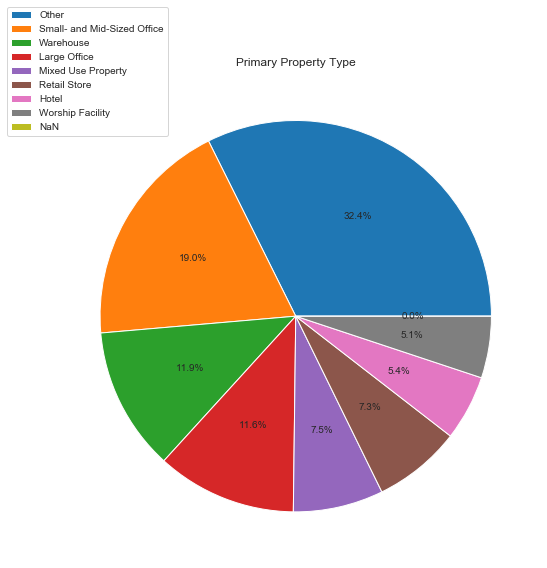

In [199]:
fig = plt.figure(figsize = (9,9))

plt.title('Primary Property Type')
plt.pie(PPT_rec['PrimaryPropertyType'], autopct='%1.1f%%')
plt.legend(PPT_rec.index, loc='center left', bbox_to_anchor=(-0.1, 1.))

In [200]:
data_cat=transf_binaire_multiclass(data_cat, 'PrimaryPropertyType')

In [201]:
#Variable NumberofBuildings
data_tr=transf_binaire(data_tr, data_tr['NumberofBuildings']==1, 'OneBuilding')

#Variable SecondLargestPropretyUseType
data_cat=transf_binaire(data_cat, data_cat['SecondLargestPropertyUseType']!='None', 'SecondLPT')

#Variable ThirdLargestPropretyUseType
data_cat=transf_binaire(data_cat, data_cat['ThirdLargestPropertyUseType']!='None', 'ThirdLPT')

#Variable YearsENERGYSTARCertified
data_cat=transf_binaire(data_cat, data_cat['YearsENERGYSTARCertified']!='None', 'ENERGYSTARCertified')

#Variable PropertyGFAParking
data_tr=transf_binaire(data_tr, data_tr['PropertyGFAParking']!=0, 'Parking')

#Variable NumberofFloors
data_cat["NumberofFloors_cat"] = pd.cut(data_tr["NumberofFloors"], bins=[-1, 1, 4, 10, np.inf], labels=[1, 2, 3, 4])

#### 4.3.2.2 Variables quantitatives 

Comme nous avons vu dans la visualisation de données à l'aide de histogrammes (chap. 3.2), beaucoup de variables quantitatives est aplati vers la gauche et ne suivent pas une distribution gaussienne. Nous allons remédier à ce problème grâce aux transformations logarithmiques.

In [202]:
def transf_log(data, var):
    """Fonction qui transforme les variables numériques en log :
    
    Entrées :
        data : DataFrame
        var : variable numérique à transformer
        
    Sortie :
        data : DataFrame avec les variables transformées    
    """
    data['temp'] = (data[var]+1).apply(np.log)
    
    nom = var +'_log' 
    
    data.rename(columns = {'temp':nom}, inplace = True)
    
    return data    

In [203]:
data_tr=transf_log(data_tr, 'TotalGHGEmissions')
data_tr=transf_log(data_tr, 'LargestPropertyUseTypeGFA')
data_tr=transf_log(data_tr, 'SiteEnergyUse(kBtu)')

In [204]:
data_tr.columns

Index(['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'SourceEUI(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)_pct',
       'NaturalGas(kBtu)_pct', 'SteamUse', 'NaturalGas', 'OneBuilding',
       'Parking', 'TotalGHGEmissions_log', 'LargestPropertyUseTypeGFA_log',
       'SiteEnergyUse(kBtu)_log'],
      dtype='object')

Text(0.5, 1.0, 'Log TotalGHGEmissions')

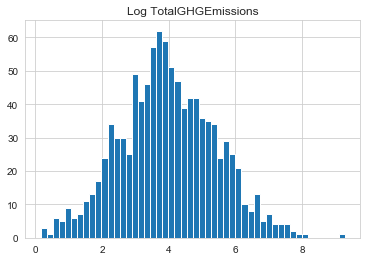

In [205]:
hist1 = plt.hist(data_tr['TotalGHGEmissions_log'], bins=50)
plt.title('Log TotalGHGEmissions')

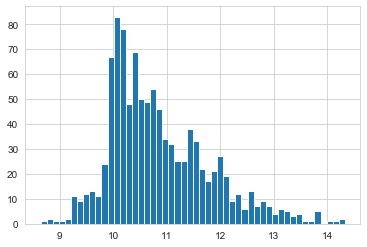

In [206]:
hist=plt.hist(data_tr['LargestPropertyUseTypeGFA_log'], bins=50)

Text(0.5, 1.0, 'Log SiteEnergyUse(kBtu)')

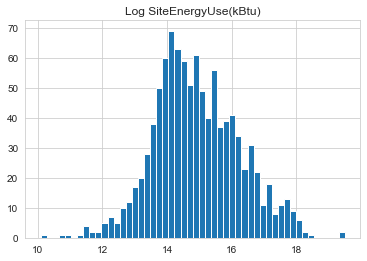

In [207]:
hist=plt.hist(data_tr['SiteEnergyUse(kBtu)_log'], bins=50)
plt.title('Log SiteEnergyUse(kBtu)')

Nous pouvons voir que les transformations en log nous ont permis d'avoir une meilleure approximation de distribution gaussienne.

##### Variable Age

In [208]:
# Variable Age
data_tr['Age'] = 2019 - data_tr['YearBuilt']

### 4.3.3 Agrégation de features

#### Ratio Source / Site EUI

Nous allons créer un ratio Source / Site EUI qui exprime la proportion de perte d'énergie lié à sa génération, transmission et distribution jusqu'au bâtiment. Le ratio est décrit dans la litérature (https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/difference) L'image ci-dessous décrit la différence entre Source et Site énérgie.  

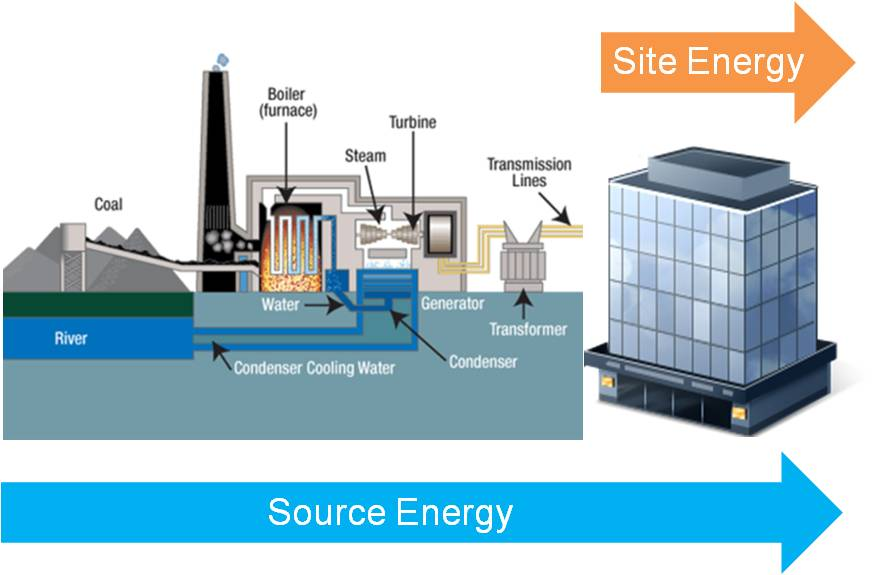

In [209]:
from IPython.display import Image
Image('Figures/The difference between source and site energy_1.jpg')

In [210]:
data_tr['RatioSourceSite']=round(data_tr['SourceEUI(kBtu/sf)']/data_tr['SiteEUI(kBtu/sf)'], 2)

In [211]:
data_tr['RatioSourceSite'].describe()

count    1020.000000
mean        2.528873
std         0.568852
min         0.000000
25%         2.100000
50%         2.570000
75%         3.140000
max         4.670000
Name: RatioSourceSite, dtype: float64

Text(0.5, 1.0, 'Ratio Source / Site')

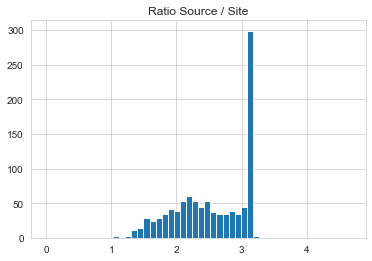

In [212]:
hist=plt.hist(data_tr['RatioSourceSite'], bins=50)
plt.title('Ratio Source / Site')

Text(0, 0.5, 'SiteEnergyUse(kBtu)_log')

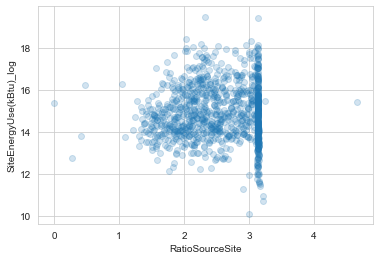

In [213]:
plt.scatter(data_tr['RatioSourceSite'], data_tr['SiteEnergyUse(kBtu)_log'], alpha=0.2)
plt.xlabel('RatioSourceSite')
plt.ylabel('SiteEnergyUse(kBtu)_log')

Text(0, 0.5, 'TotalGHGEmissions_log')

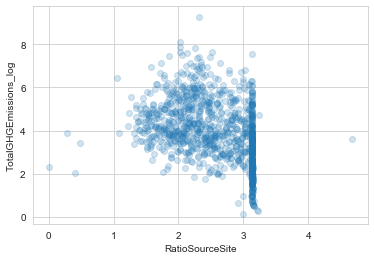

In [214]:
plt.scatter(data_tr['RatioSourceSite'], data_tr['TotalGHGEmissions_log'], alpha=0.2)
plt.xlabel('RatioSourceSite')
plt.ylabel('TotalGHGEmissions_log')

Nous pouvons voir qu'il y a beaucoup de points du ratio cumulés autour de 3. Nous allons découper le ratio en deux classes - points inférieures et supérieures à 3. 

In [215]:
data_cat['RatioSourceSite_sup3']=np.where(data_tr['RatioSourceSite']>3, 1, 0)

In [216]:
data_cat['RatioSourceSite_sup3'].value_counts()

0    681
1    339
Name: RatioSourceSite_sup3, dtype: int64

#### Proportion de surface de bâtiment sur le surface totale

In [217]:
data_tr['PropGFABuilding']=data_tr['PropertyGFABuilding(s)']/data_tr['PropertyGFATotal']

In [218]:
data_tr['PropGFABuilding'].describe()

count    1020.000000
mean        0.937836
std         0.140090
min         0.104977
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PropGFABuilding, dtype: float64

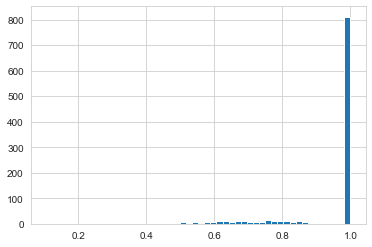

In [219]:
hist=plt.hist(data_tr['PropGFABuilding'], bins=50)

Text(0, 0.5, 'SiteEnergyUse(kBtu)_log')

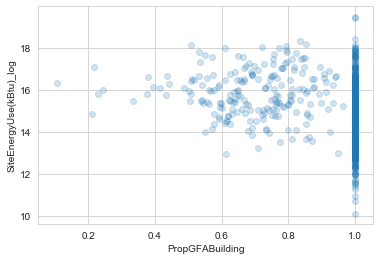

In [220]:
plt.scatter(data_tr['PropGFABuilding'], data_tr['SiteEnergyUse(kBtu)_log'], alpha=0.2)
plt.xlabel('PropGFABuilding')
plt.ylabel('SiteEnergyUse(kBtu)_log')

Text(0, 0.5, 'TotalGHGEmissions_log')

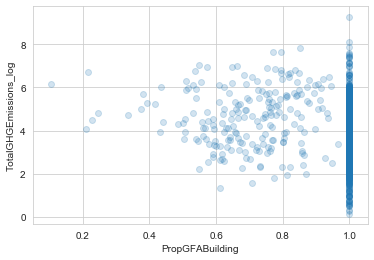

In [221]:
plt.scatter(data_tr['PropGFABuilding'], data_tr['TotalGHGEmissions_log'], alpha=0.2)
plt.xlabel('PropGFABuilding')
plt.ylabel('TotalGHGEmissions_log')

Les points qui sont = 1 sont ceux qui n'ont pas de parking.

### 4.3.4 Standardisation 

In [222]:
data_std=data_tr[['TotalGHGEmissions_log', 'SiteEnergyUse(kBtu)_log', 'Age', 'PropGFABuilding', 'ENERGYSTARScore', 
                 'SteamUse(kBtu)_pct', 'NaturalGas(kBtu)_pct','LargestPropertyUseTypeGFA_log', 'RatioSourceSite']]

In [223]:
data_tr.drop(['TotalGHGEmissions_log', 'SiteEnergyUse(kBtu)_log', 'Age', 'PropGFABuilding', 'ENERGYSTARScore', 
                 'SteamUse(kBtu)_pct', 'NaturalGas(kBtu)_pct','LargestPropertyUseTypeGFA_log', 'RatioSourceSite'], 
            axis=1, inplace=True)

In [224]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(data_std)

data_tr_std =std_scale.transform(data_std)

data_tr_std= DataFrame(data_tr_std, columns=data_std.columns, index=data_std.index)

data_tr_std.head()

TotalGHGEmissions_log  SiteEnergyUse(kBtu)_log       Age  PropGFABuilding  \
0              -1.453582                -0.983742  1.815554         0.443960   
1               0.247144                 0.119905  1.633752         0.443960   
2              -0.036165                 0.058244 -1.426581         0.443960   
3              -0.391439                -0.727012  0.118736         0.443960   
4              -0.623087                -0.002342 -0.759974        -1.920356   

   ENERGYSTARScore  SteamUse(kBtu)_pct  NaturalGas(kBtu)_pct  \
0         0.216901           -0.231282             -1.019989   
1         0.255545           -0.231282              0.156555   
2        -1.715314           -0.231282             -0.335254   
3        -2.024468           -0.231282              0.524558   
4         0.603343           -0.231282             -1.019989   

   LargestPropertyUseTypeGFA_log  RatioSourceSite  
0                      -0.471447         1.074845  
1                       0.105298        -0.068369  
2                      -0.571334         0.406505  
3                      -0.614668        -0.420127  
4                       0.132046         1.074845

In [225]:
joblib.dump(std_scale, "std_scale.pkl")

['std_scale.pkl']

Nous avons sauvegardé l'objet std_scale afin de pouvoir utiliser la même transformation pour les données test lors de validation de modèle final.

A la fin, nous allons concaténer les données numériques et catégorielles et exclure les variable qui ne vont pas nous servir:

In [234]:
data_clean = pd.concat([data_tr_std, data_cat], axis=1)

In [235]:
data_clean = pd.concat([data_clean, data_tr], axis=1)

In [236]:
data_clean.head()

TotalGHGEmissions_log  SiteEnergyUse(kBtu)_log       Age  PropGFABuilding  \
0              -1.453582                -0.983742  1.815554         0.443960   
1               0.247144                 0.119905  1.633752         0.443960   
2              -0.036165                 0.058244 -1.426581         0.443960   
3              -0.391439                -0.727012  0.118736         0.443960   
4              -0.623087                -0.002342 -0.759974        -1.920356   

   ENERGYSTARScore  SteamUse(kBtu)_pct  NaturalGas(kBtu)_pct  \
0         0.216901           -0.231282             -1.019989   
1         0.255545           -0.231282              0.156555   
2        -1.715314           -0.231282             -0.335254   
3        -2.024468           -0.231282              0.524558   
4         0.603343           -0.231282             -1.019989   

   LargestPropertyUseTypeGFA_log  RatioSourceSite  \
0                      -0.471447         1.074845   
1                       0.105298        -0.068369   
2                      -0.571334         0.406505   
3                      -0.614668        -0.420127   
4                       0.132046         1.074845   

           PrimaryPropertyType  ...  SteamUse(kBtu) Electricity(kBtu)  \
0                 Retail Store  ...             0.0          813641.0   
1  Small- and Mid-Sized Office  ...             0.0         2428286.0   
2  Small- and Mid-Sized Office  ...             0.0         2657382.0   
3                        Other  ...             0.0          678658.0   
4  Small- and Mid-Sized Office  ...             0.0         2991674.0   

  NaturalGas(kBtu) TotalGHGEmissions SourceEUI(kBtu/sf) SiteEUI(kBtu/sf)  \
0              0.0              5.67          77.500000        24.700001   
1        1090173.0             74.83         154.500000        62.000000   
2         584696.0             49.58         165.800003        60.000000   
3         465168.0             29.44          91.000000        39.700001   
4              0.0             20.86         161.399994        51.400002   

   SteamUse  NaturalGas  OneBuilding  Parking  
0         0           0            1        0  
1         0           1            1        0  
2         0           1            1        0  
3         0           1            1        0  
4         0           0            1        1  

[5 rows x 56 columns]

In [237]:
data_clean.columns

Index(['TotalGHGEmissions_log', 'SiteEnergyUse(kBtu)_log', 'Age',
       'PropGFABuilding', 'ENERGYSTARScore', 'SteamUse(kBtu)_pct',
       'NaturalGas(kBtu)_pct', 'LargestPropertyUseTypeGFA_log',
       'RatioSourceSite', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'ListOfAllPropertyUseTypes',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'CouncilDistrictCode_1',
       'CouncilDistrictCode_2', 'CouncilDistrictCode_3',
       'CouncilDistrictCode_4', 'CouncilDistrictCode_5',
       'CouncilDistrictCode_6', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Warehouse', 'SecondLPT', 'ThirdLPT',
       'ENERGYSTARCertified', 'NumberofFloors_cat', 'RatioSourceSite_sup3',
       'Lat

In [239]:
data_clean['PrimaryPropertyType'].value_counts()

Other                          330
Small- and Mid-Sized Office    194
Warehouse                      121
Large Office                   118
Mixed Use Property              76
Retail Store                    74
Hotel                           55
Worship Facility                52
Name: PrimaryPropertyType, dtype: int64

Avant supprimer la variable PrimaryPropertyType recodé, nous allons visualiser les cibles en fonction de cette variable :

Text(0.5, 1.0, 'Emissions de CO2 en fonction de type de bâtiment')

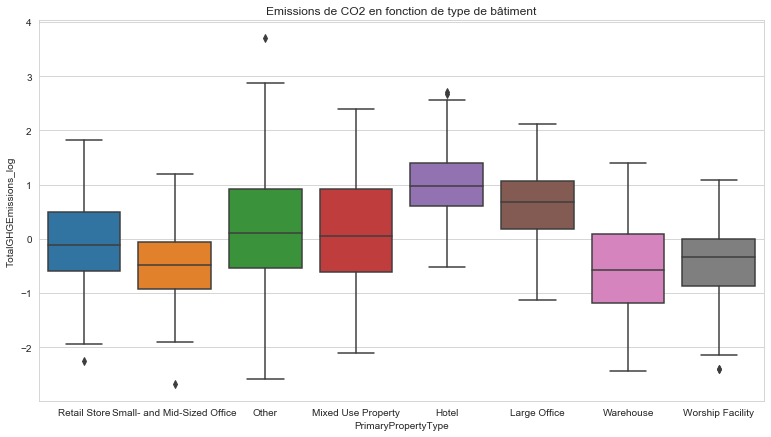

In [249]:
fig = plt.figure(figsize=(13,7))
ax = sns.boxplot(x="PrimaryPropertyType", y="TotalGHGEmissions_log", data=data_clean)
plt.title("Emissions de CO2 en fonction de type de bâtiment")

Text(0.5, 1.0, "Consommation d'énergie en fonction de type de bâtiment")

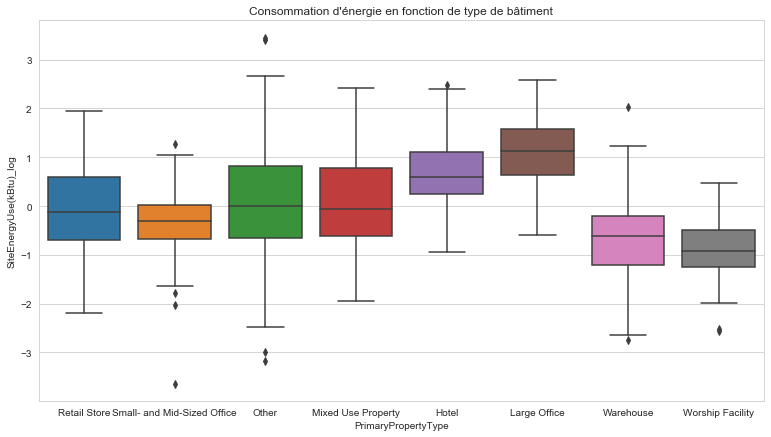

In [248]:
fig = plt.figure(figsize=(13,7))
ax = sns.boxplot(x="PrimaryPropertyType", y="SiteEnergyUse(kBtu)_log", data=data_clean)
plt.title("Consommation d'énergie en fonction de type de bâtiment")

In [230]:
data_clean.drop(['PrimaryPropertyType', 'CouncilDistrictCode','Neighborhood','ListOfAllPropertyUseTypes',
                'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
                'YearsENERGYSTARCertified','Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
                'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
                'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
                'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
                'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SourceEUI(kBtu/sf)',
                'SiteEUI(kBtu/sf)', 'RatioSourceSite'],axis=1, inplace=True)

In [231]:
data_clean.shape

(1020, 30)

In [232]:
data_clean.columns

Index(['TotalGHGEmissions_log', 'SiteEnergyUse(kBtu)_log', 'Age',
       'PropGFABuilding', 'ENERGYSTARScore', 'SteamUse(kBtu)_pct',
       'NaturalGas(kBtu)_pct', 'LargestPropertyUseTypeGFA_log',
       'CouncilDistrictCode_1', 'CouncilDistrictCode_2',
       'CouncilDistrictCode_3', 'CouncilDistrictCode_4',
       'CouncilDistrictCode_5', 'CouncilDistrictCode_6',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Warehouse', 'SecondLPT', 'ThirdLPT',
       'ENERGYSTARCertified', 'NumberofFloors_cat', 'RatioSourceSite_sup3',
       'SteamUse', 'NaturalGas', 'OneBuilding', 'Parking'],
      dtype='object')

In [233]:
data_clean.to_csv('Data/data_clean.csv', sep='\t')